In [1]:
from nearline_helpers import *
import json
%jsroot on

Welcome to JupyROOT 6.26/10


In [2]:
runs = [
    305
]
t = r.TChain('tree')
for run in runs:
    t.Add(f"../bin/*run*{run}*root")
    # t.Add(f"../bin/*run*{run}*00000*root")
t.GetEntries()

446206

In [3]:
c = r.TCanvas()
t.Draw("integrals.integral:integrals.channelTag","amcNum == 1 && integrals.integral > 10000","colz")
# c.SetLogy()
c.Draw()

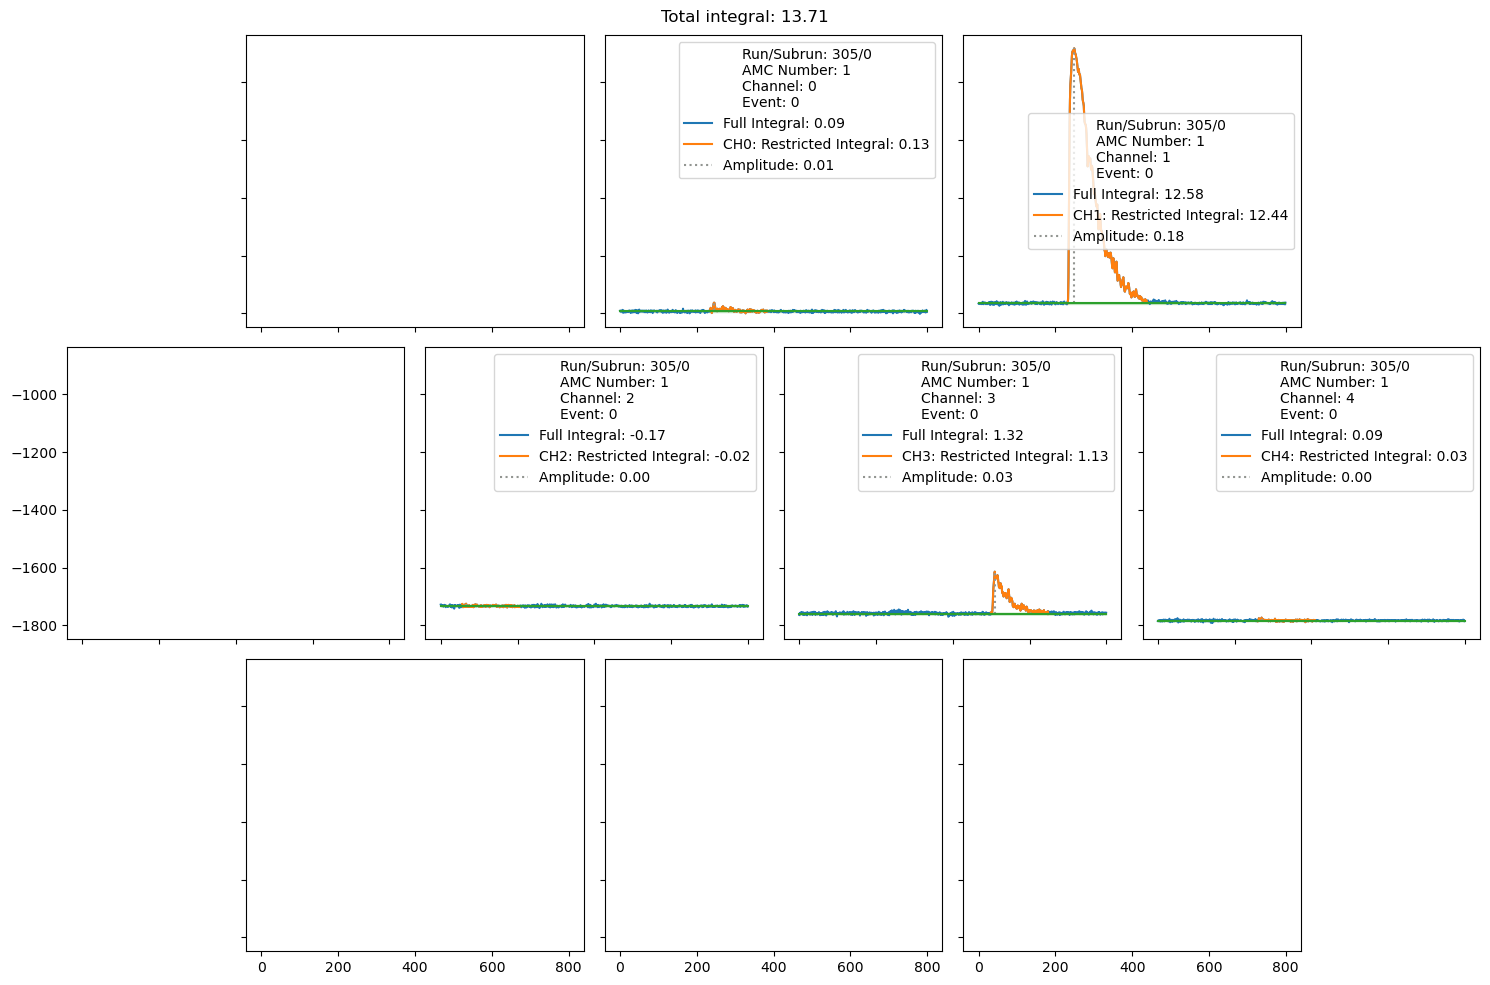

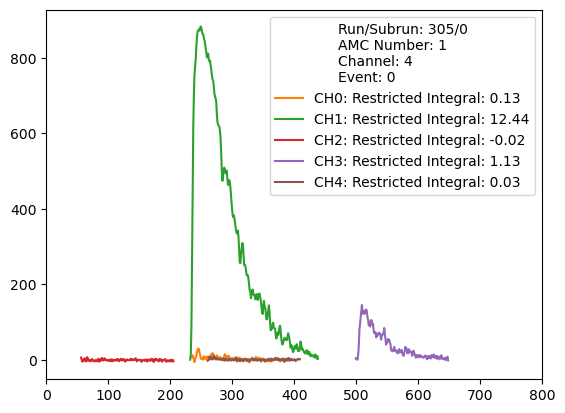

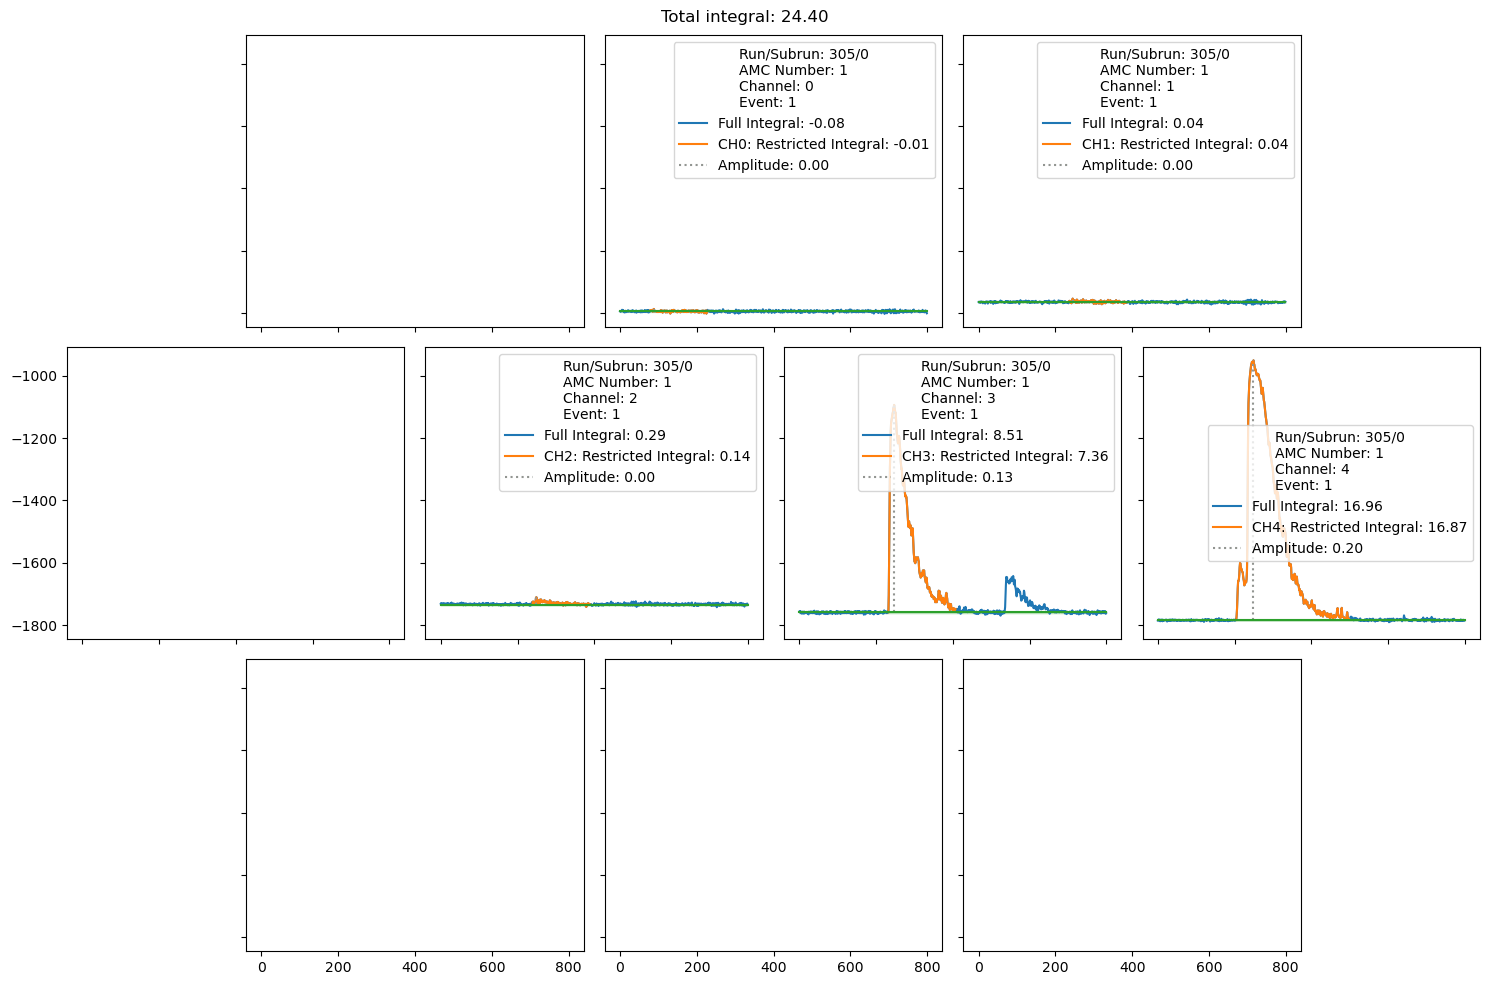

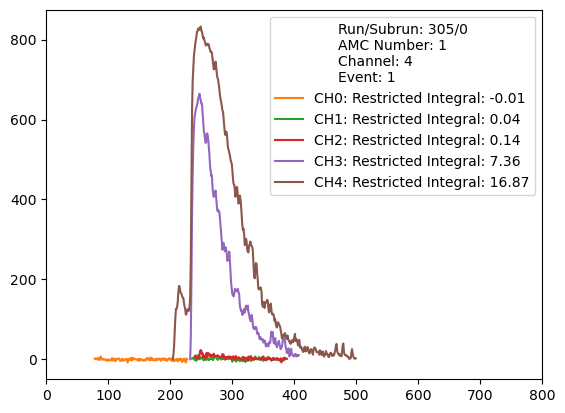

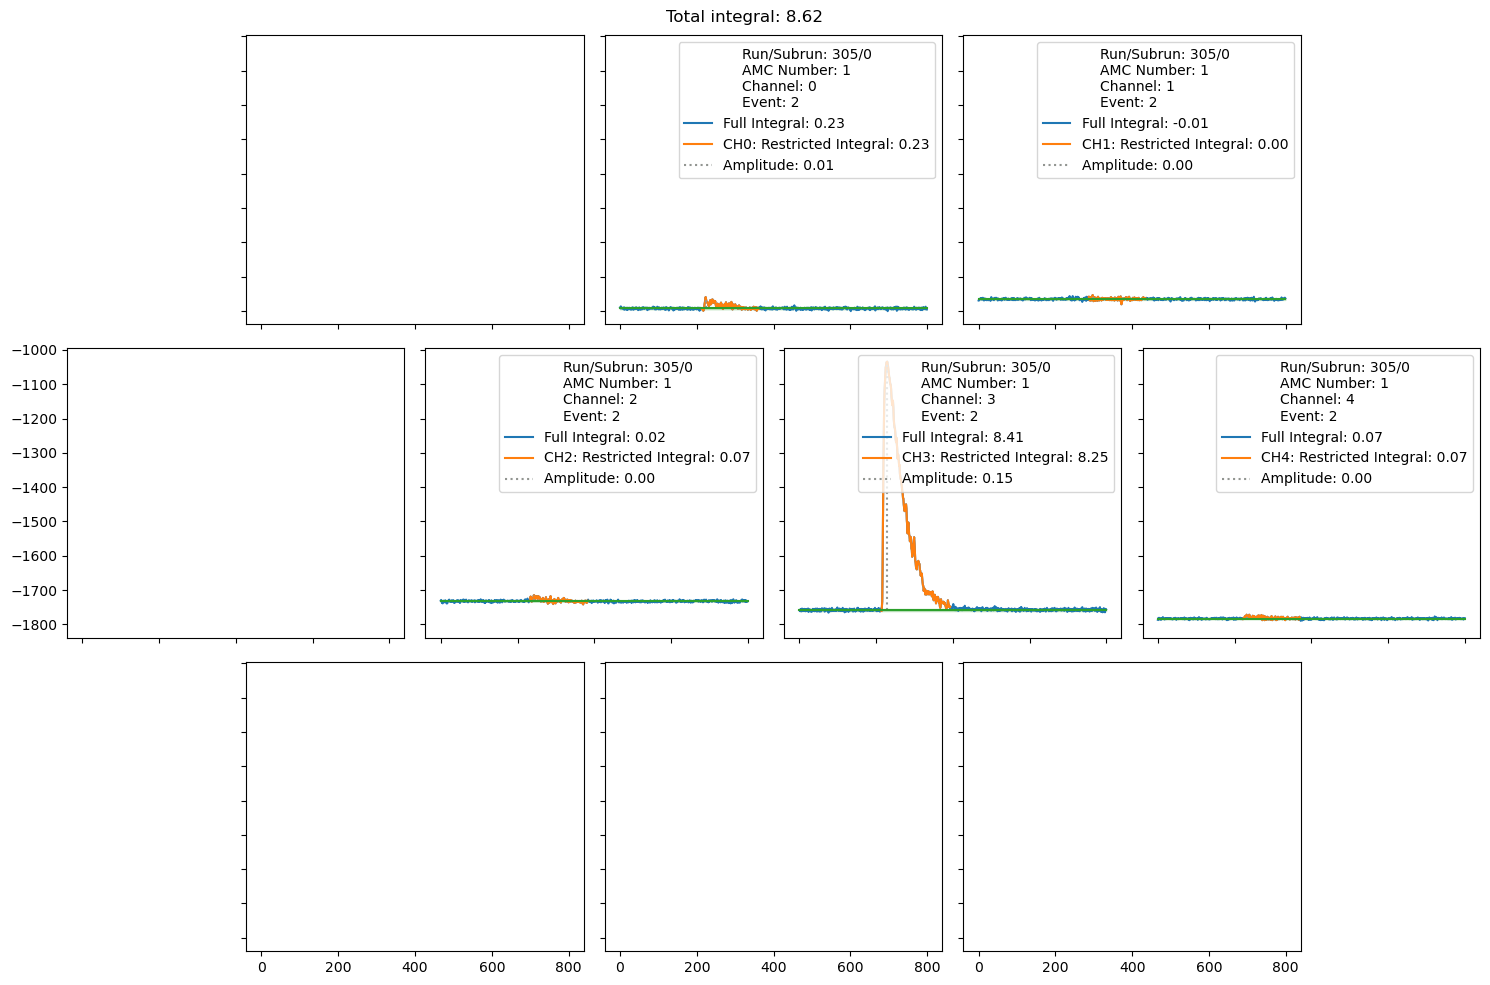

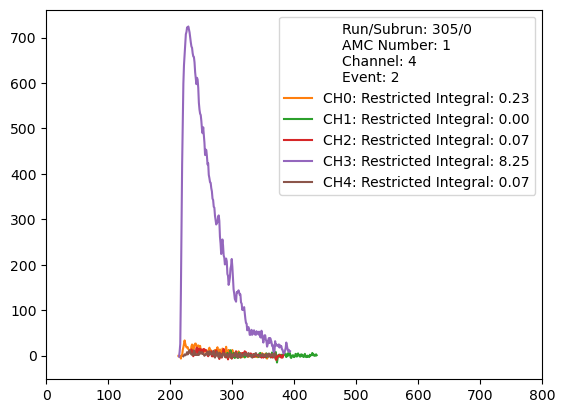

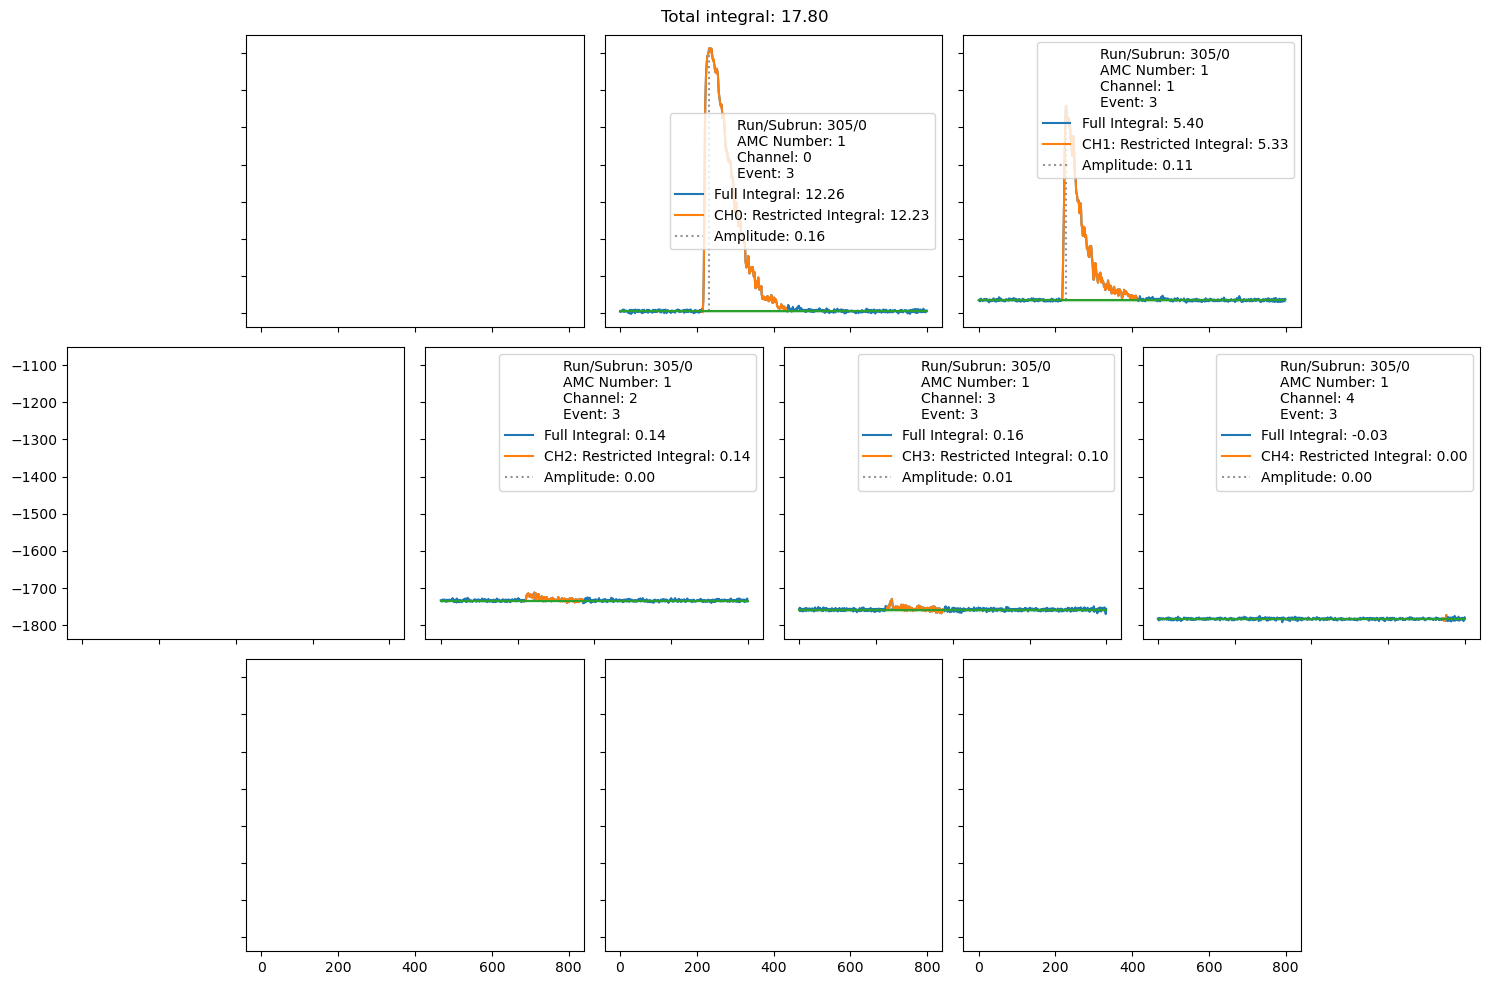

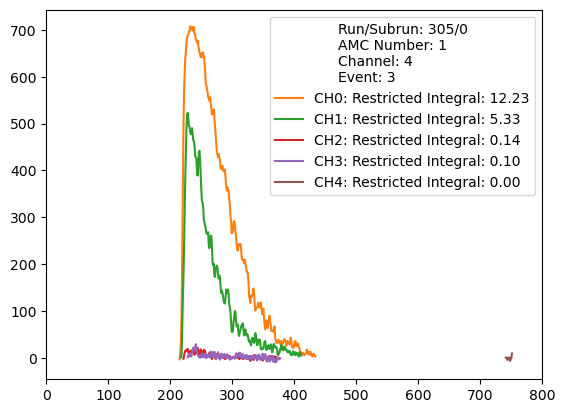

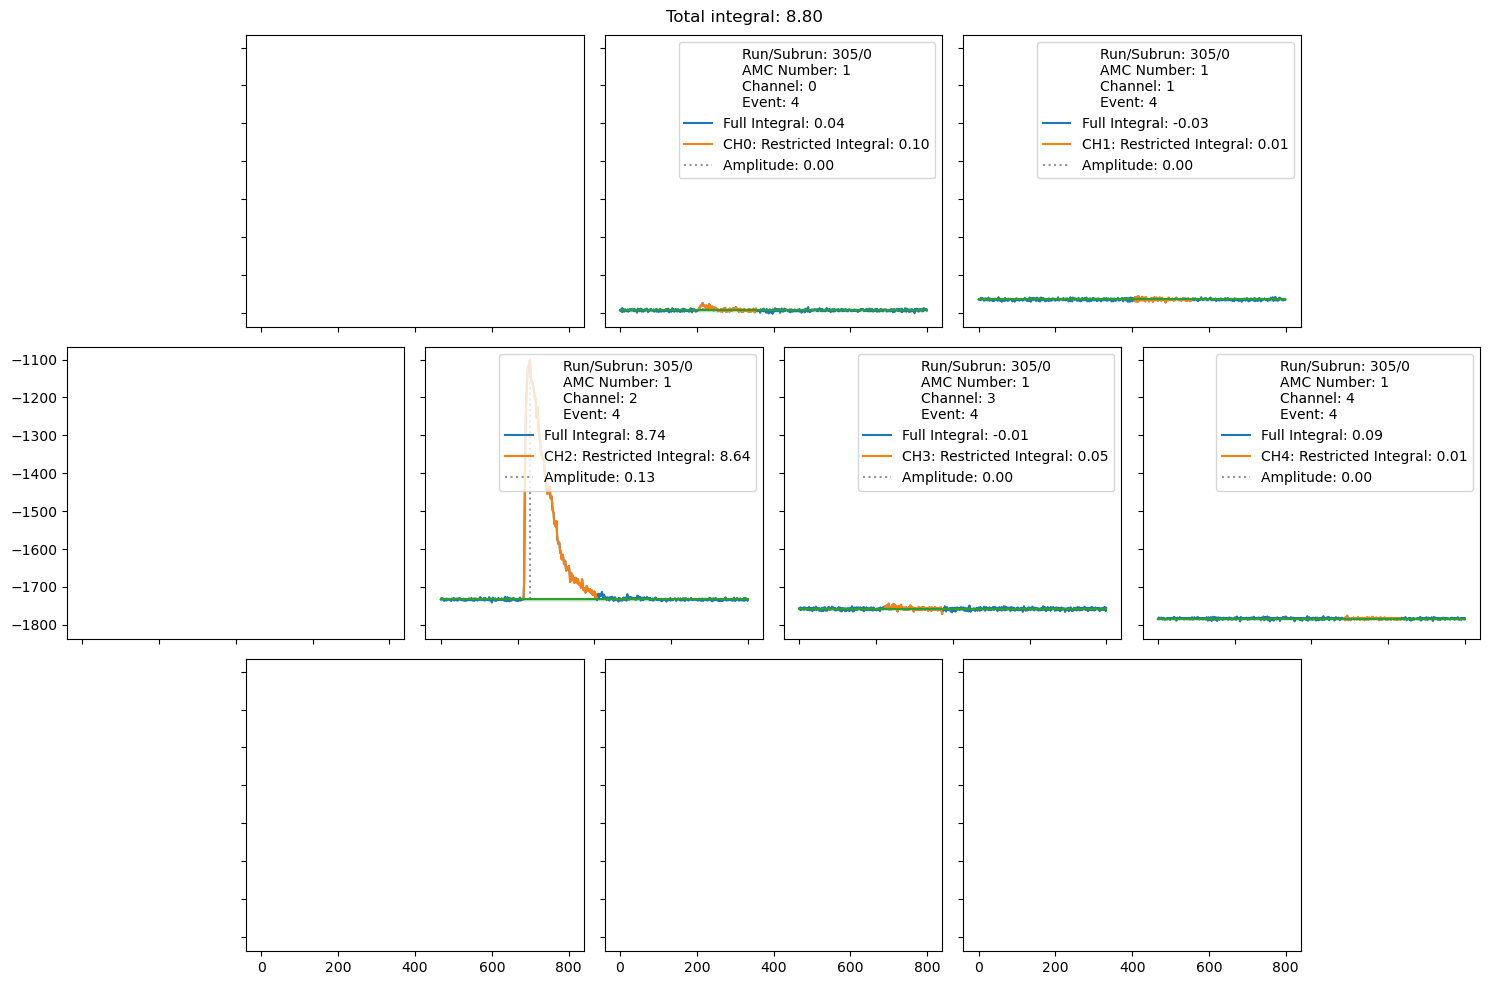

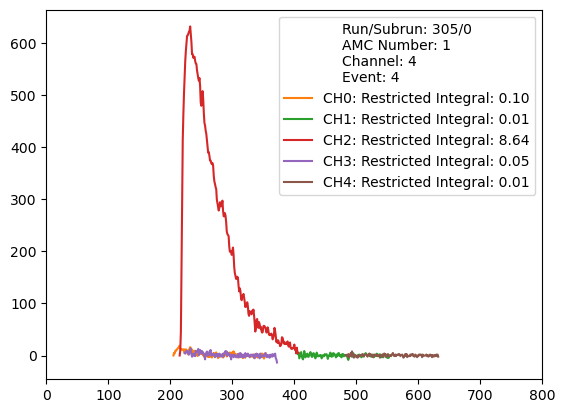

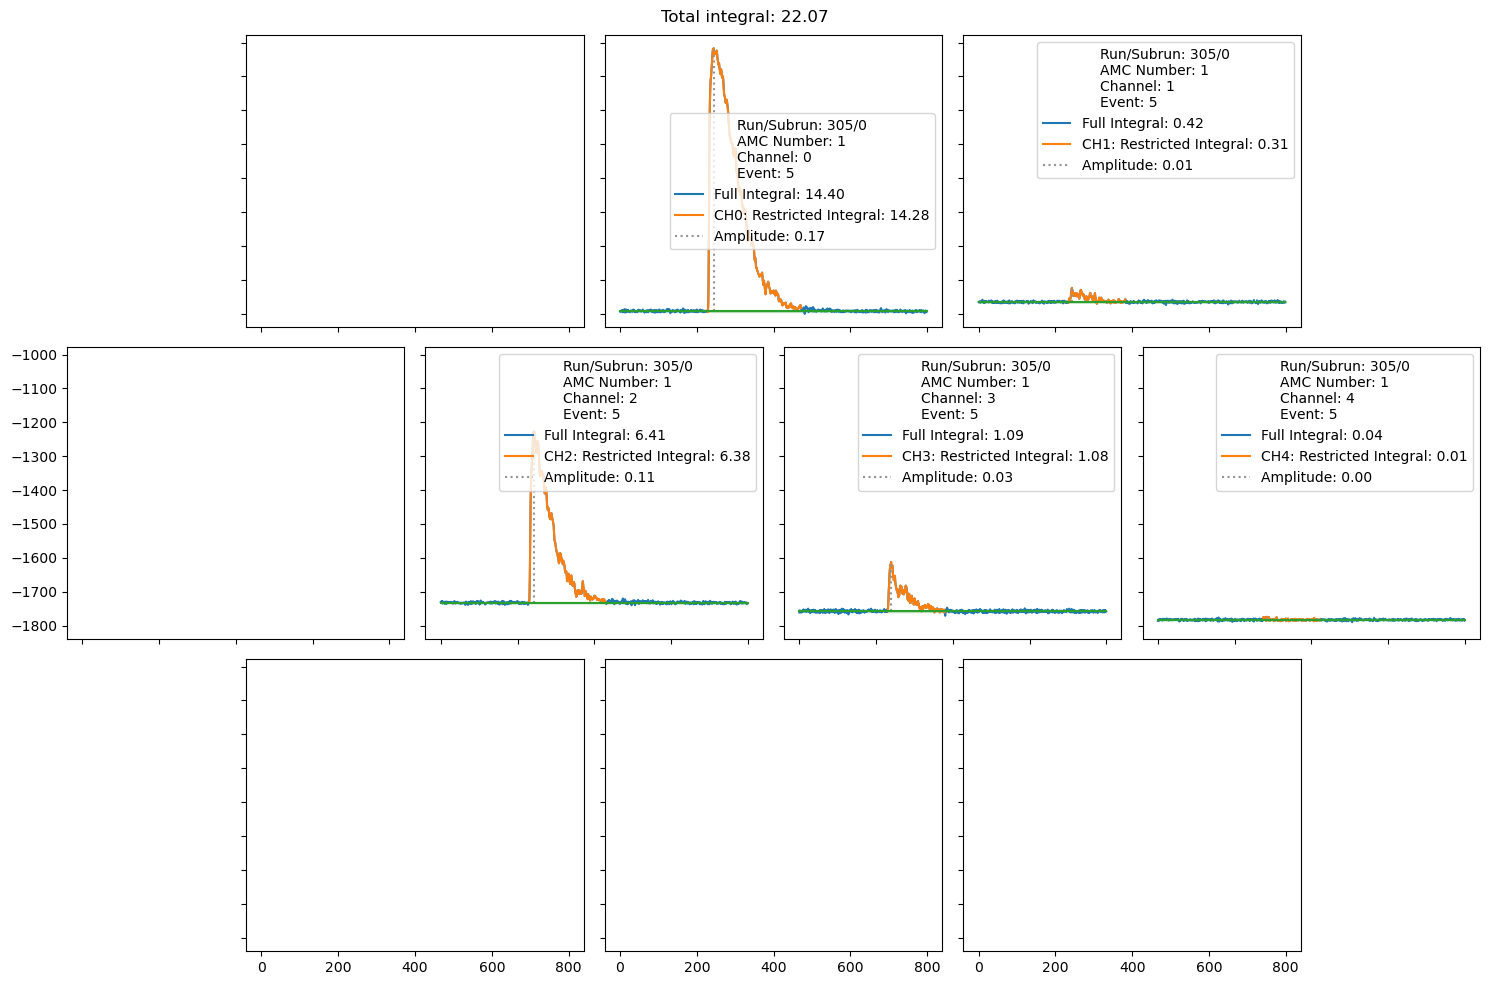

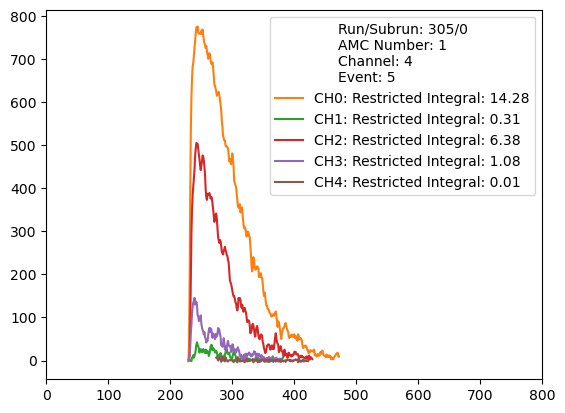

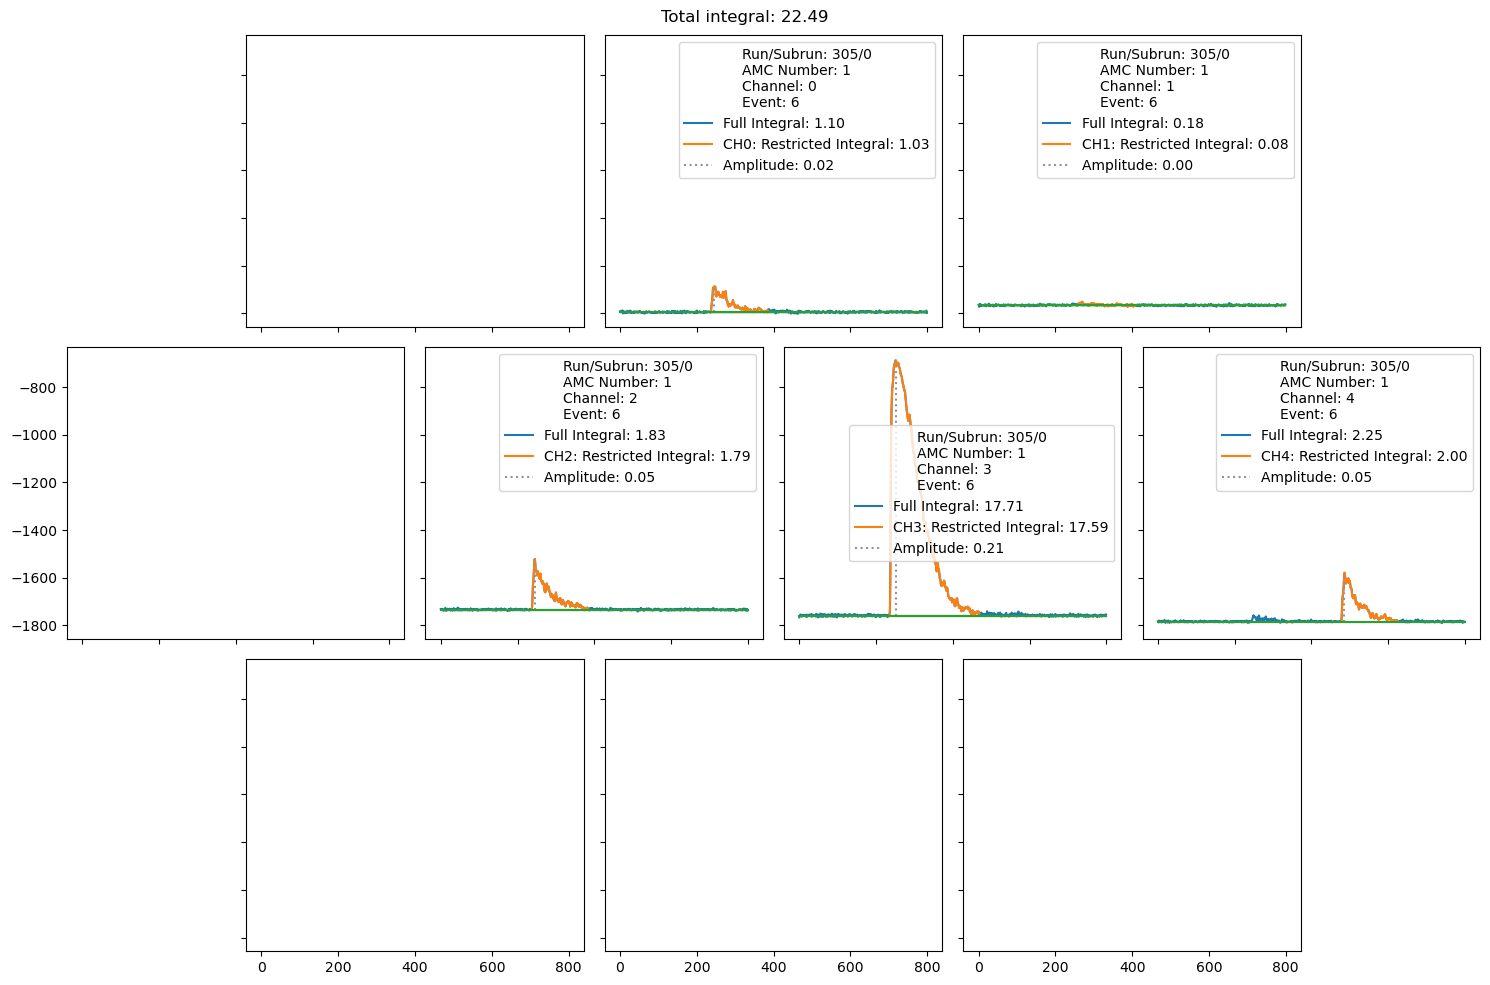

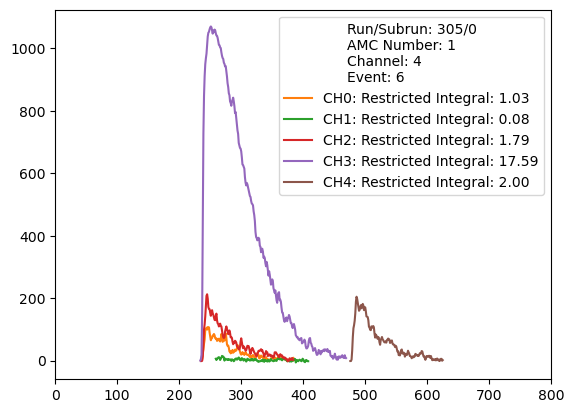

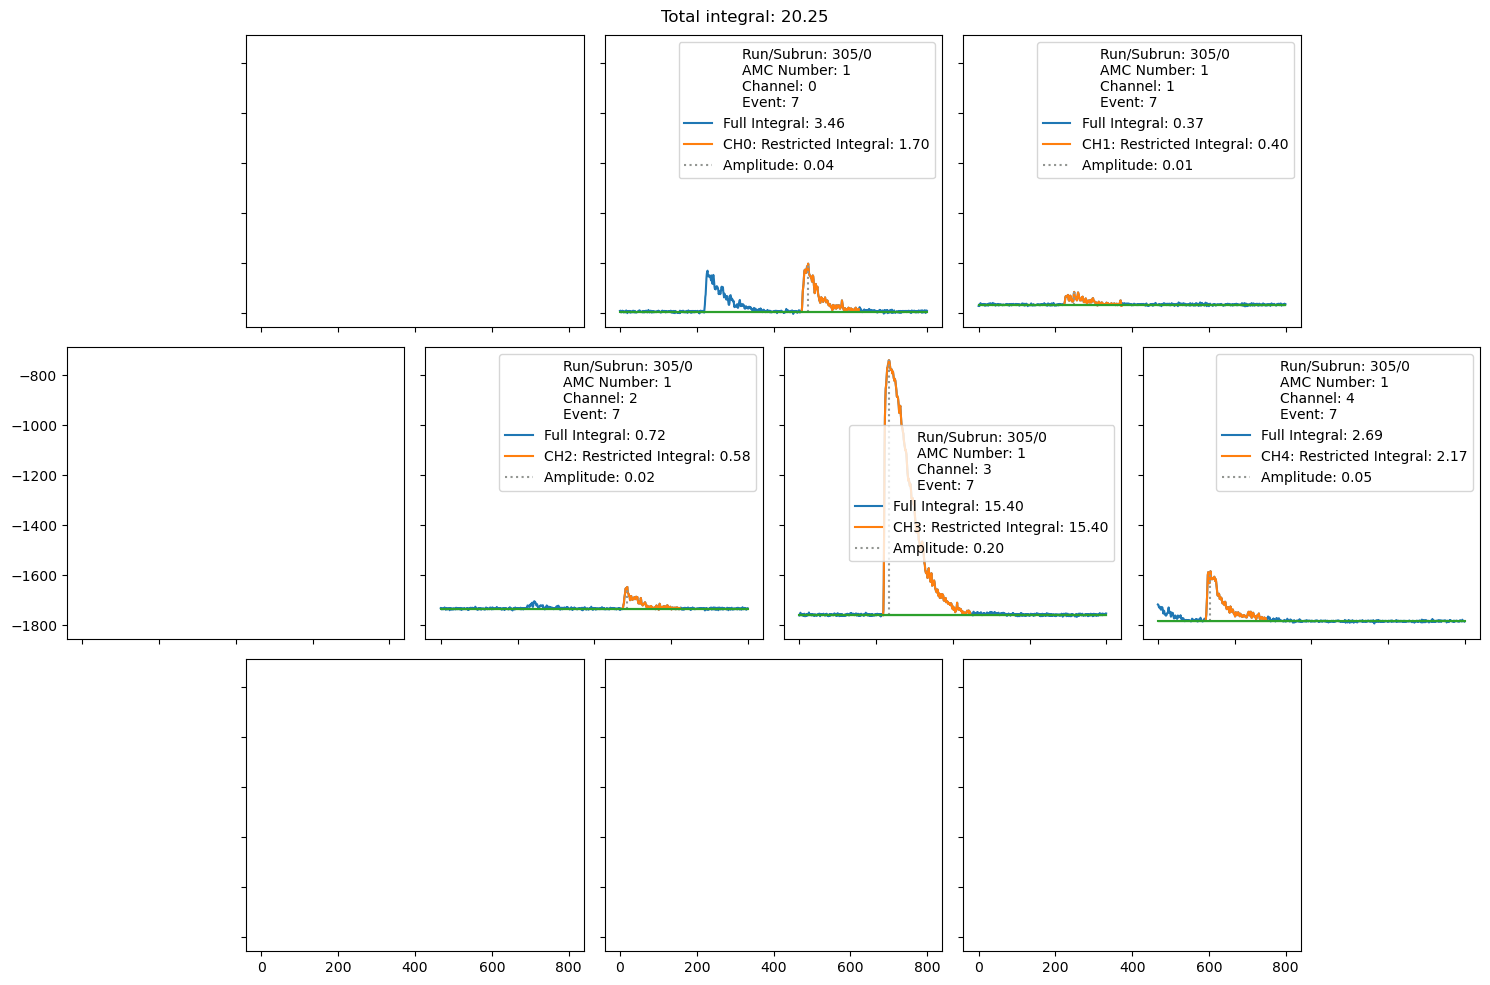

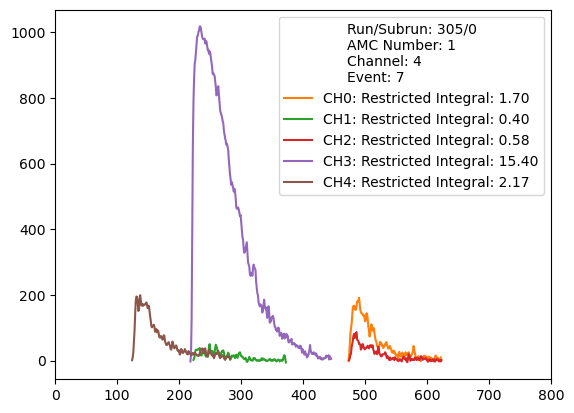

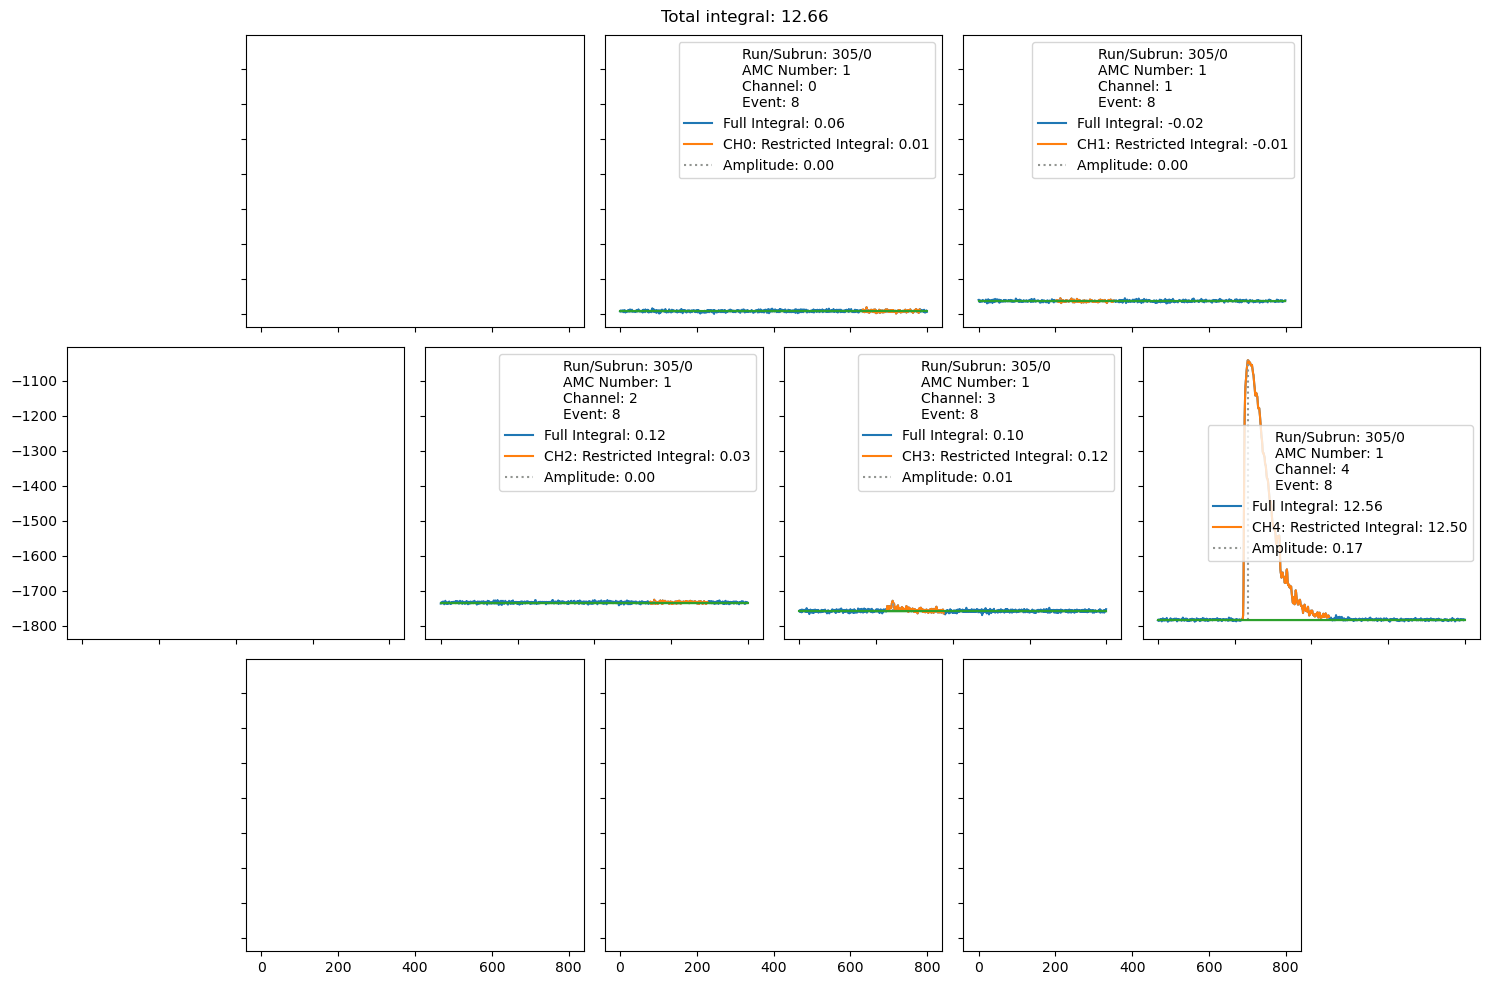

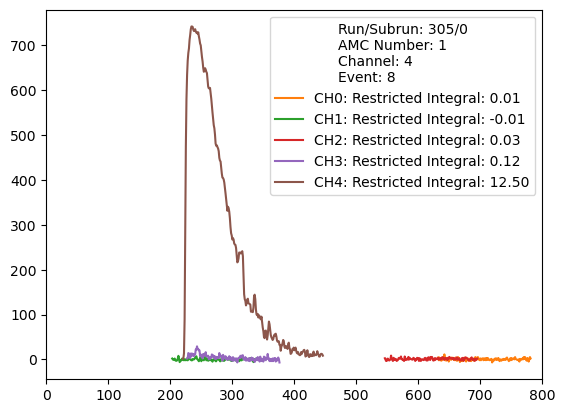

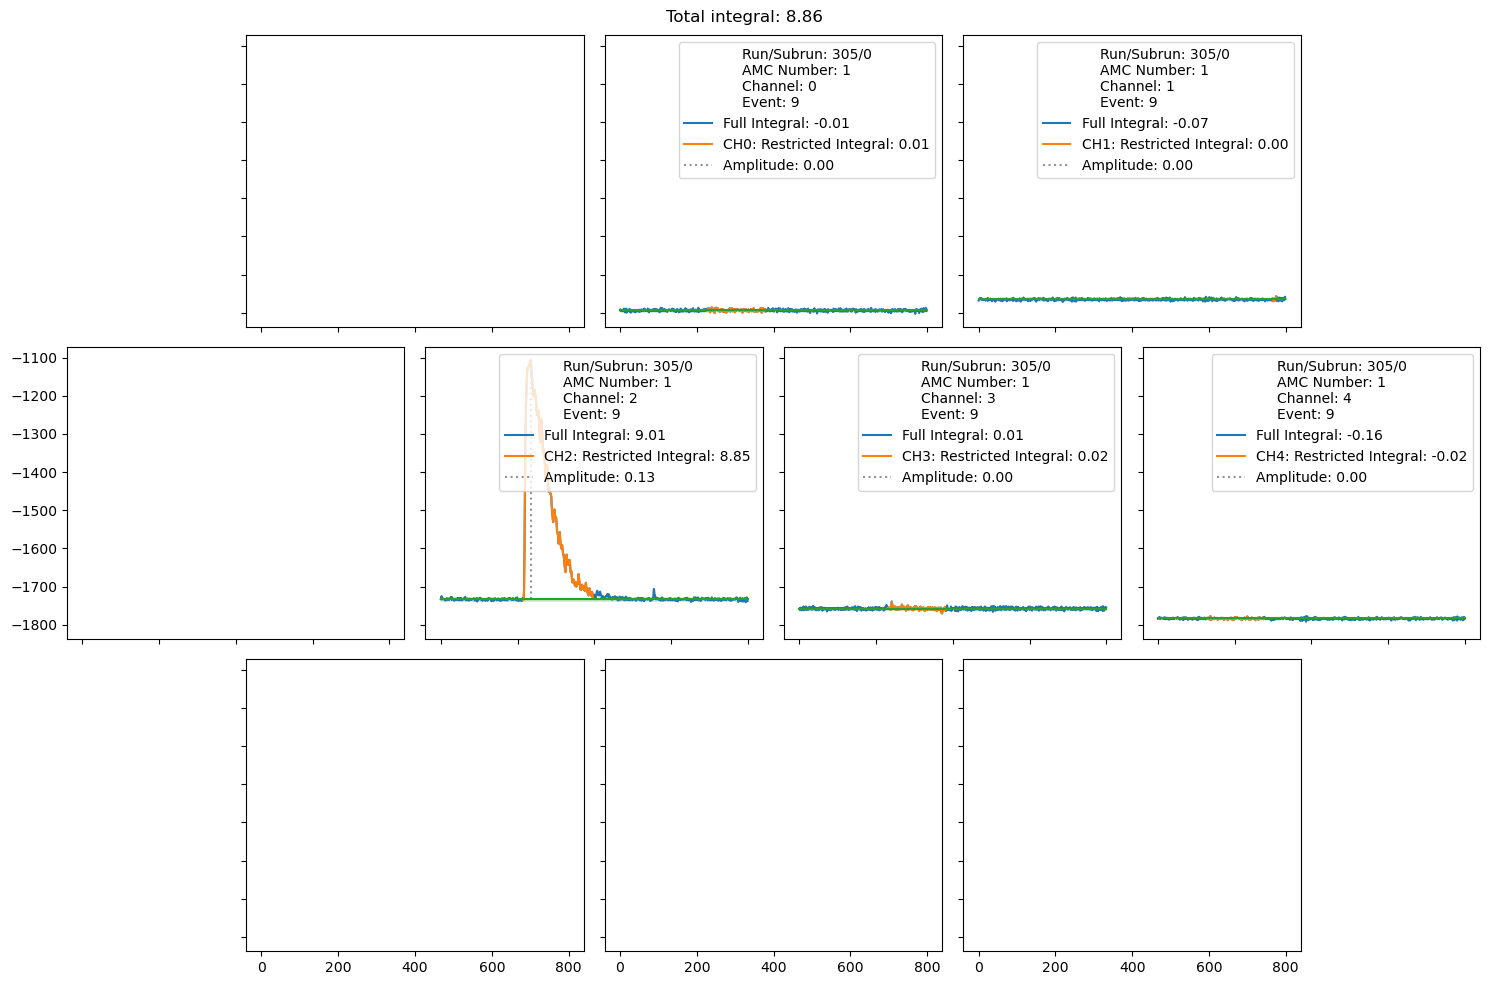

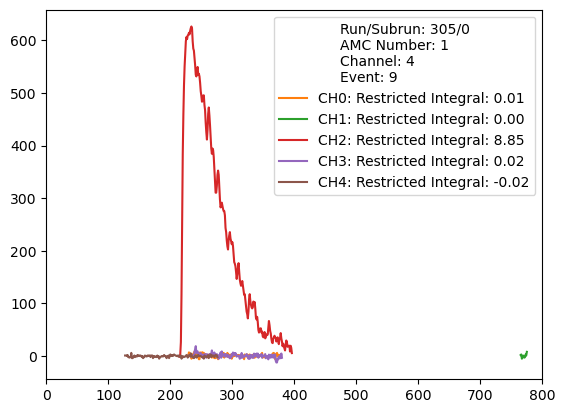

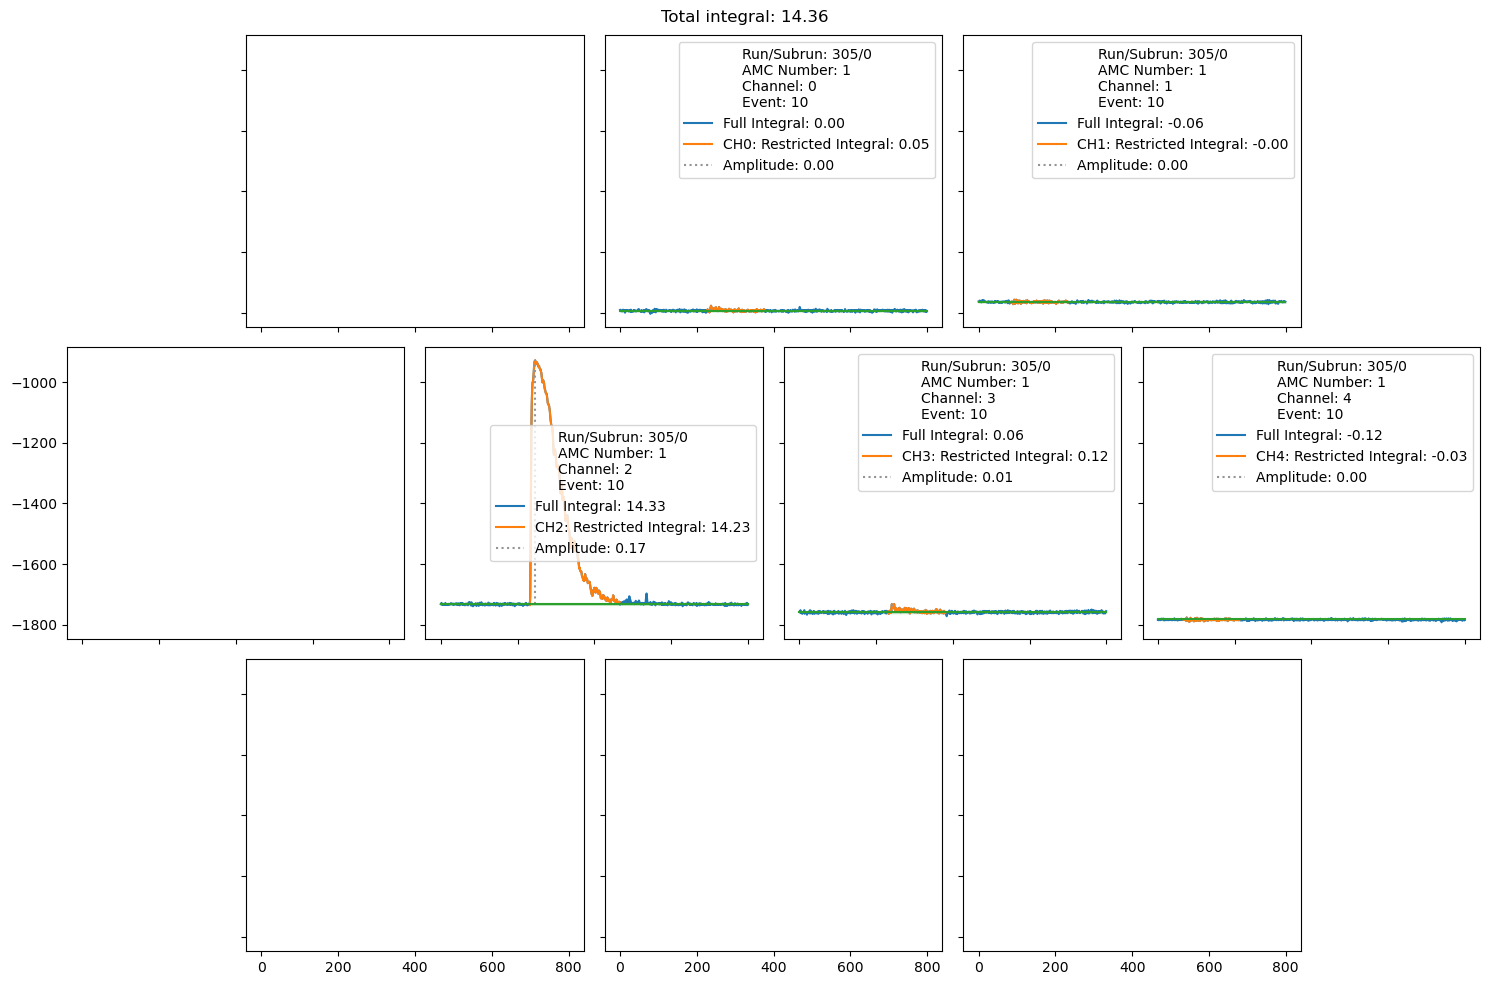

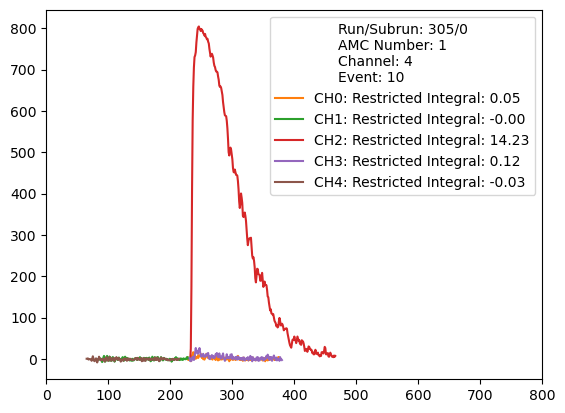

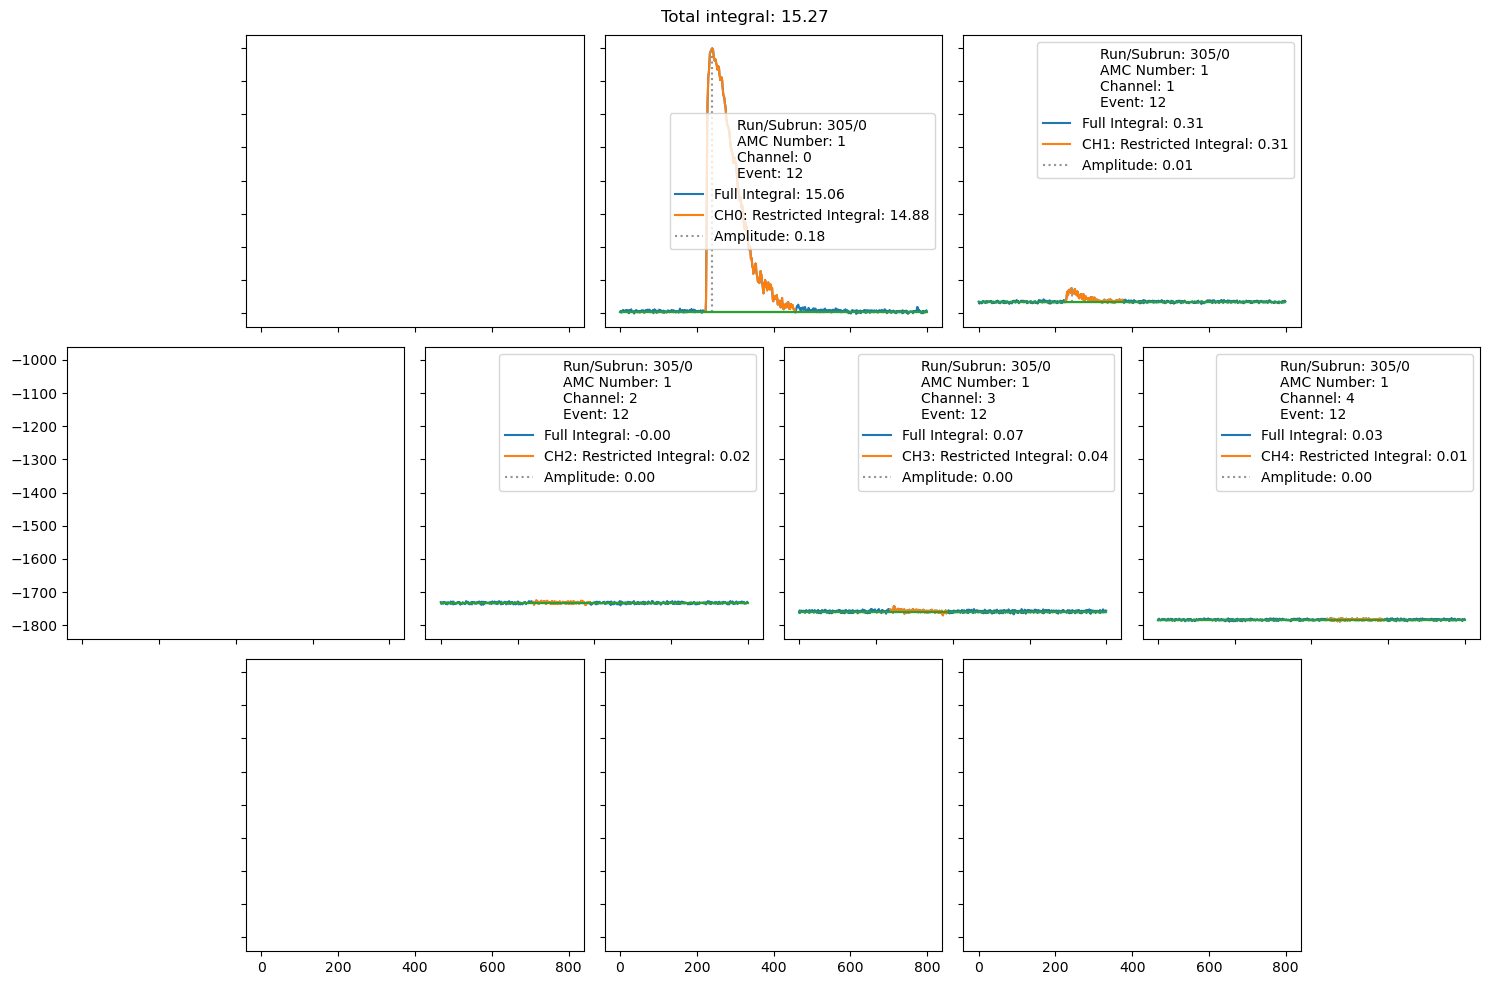

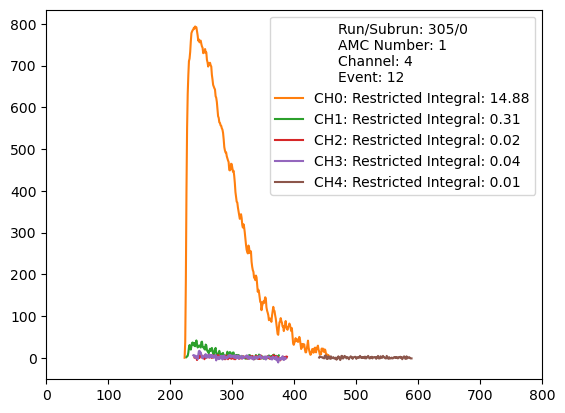

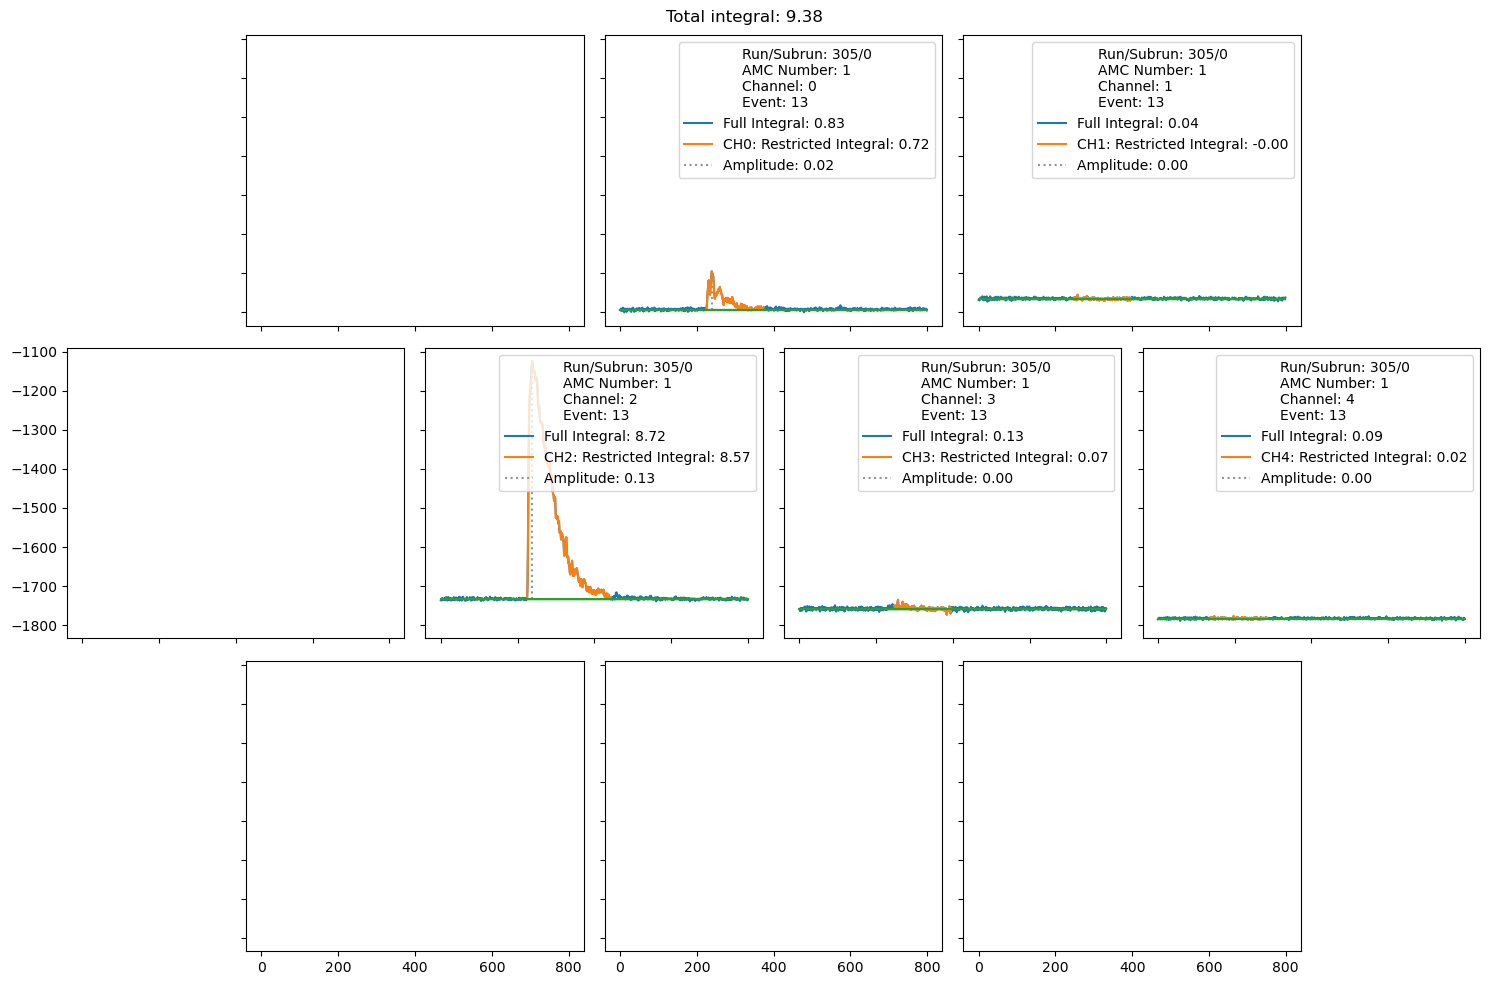

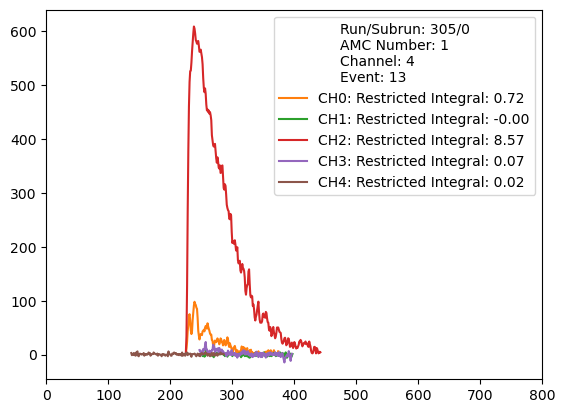

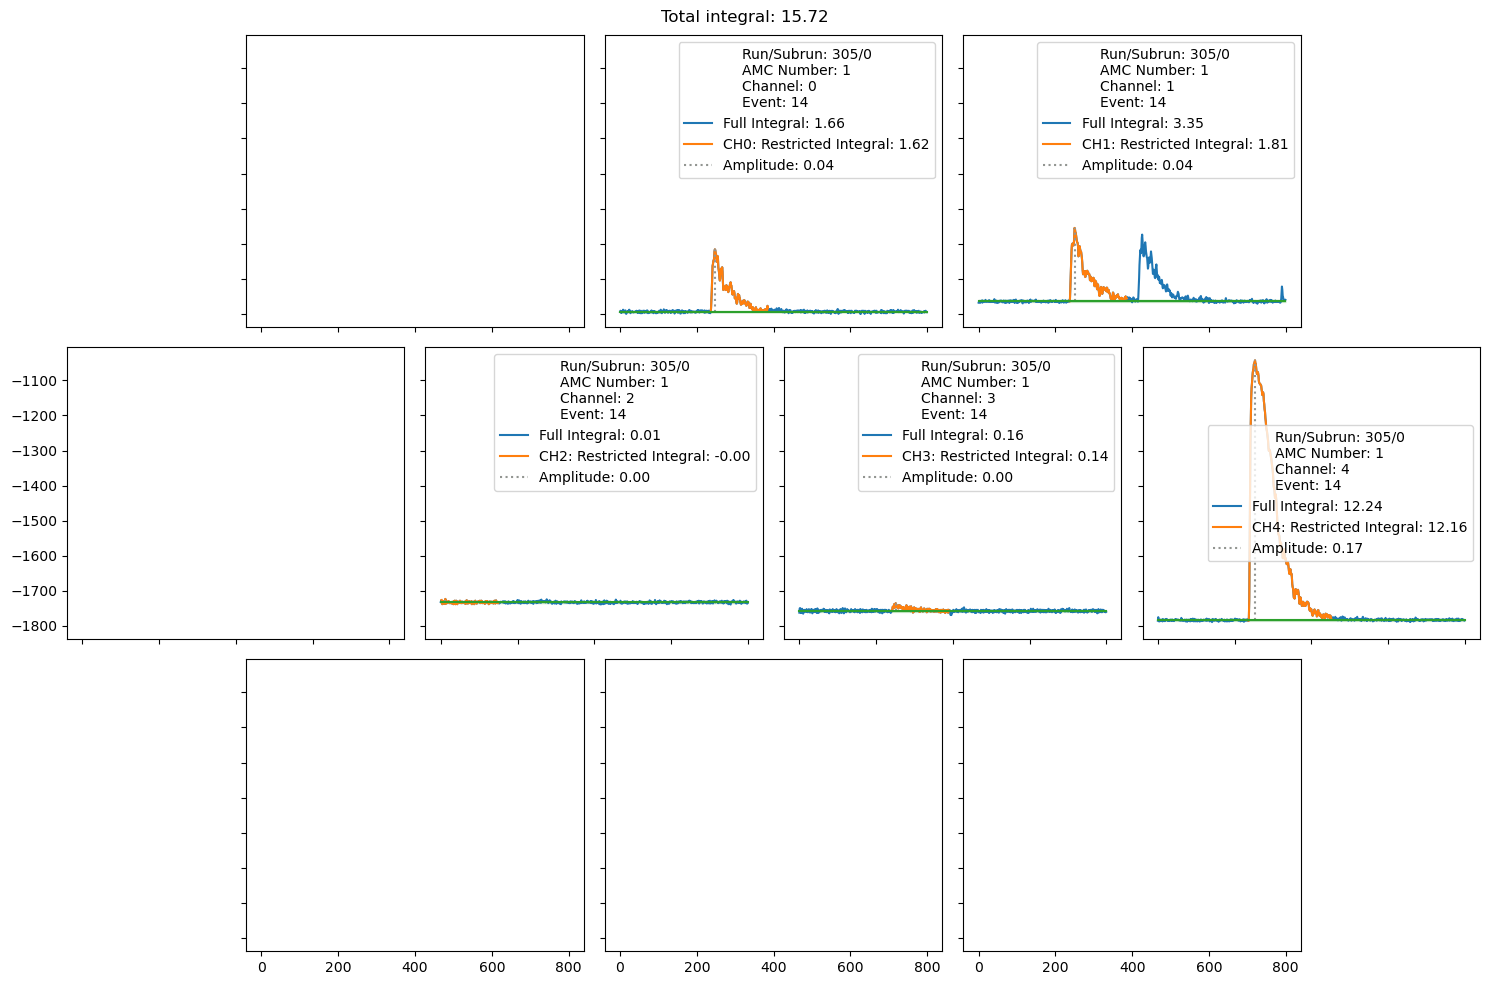

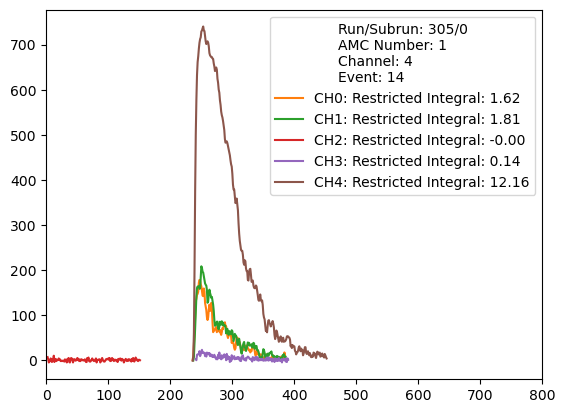

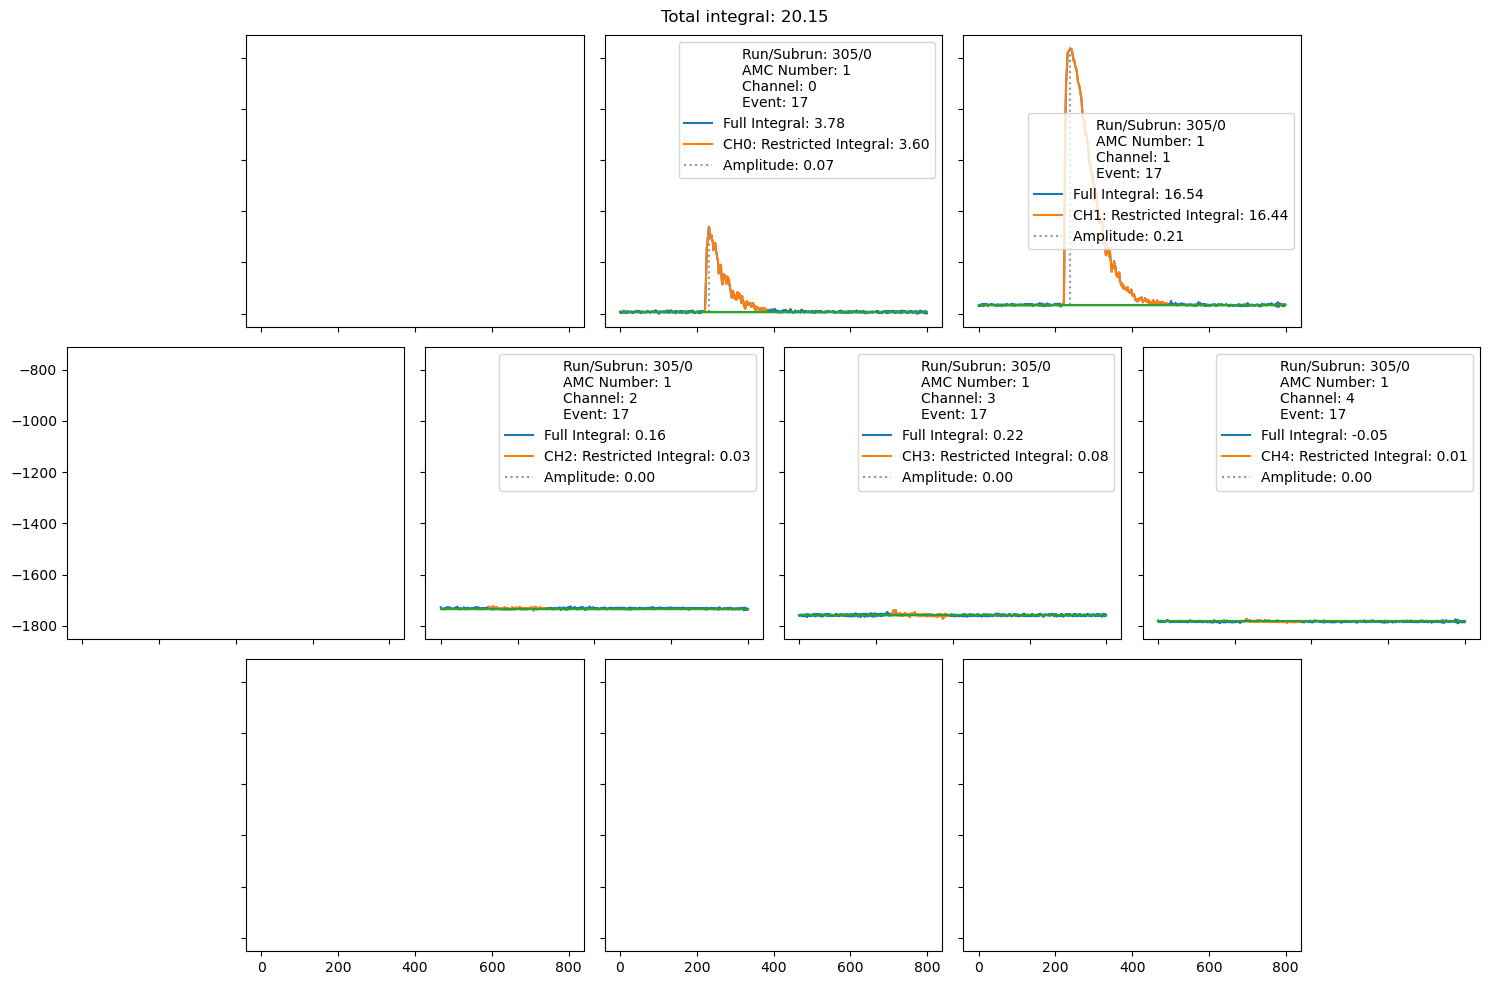

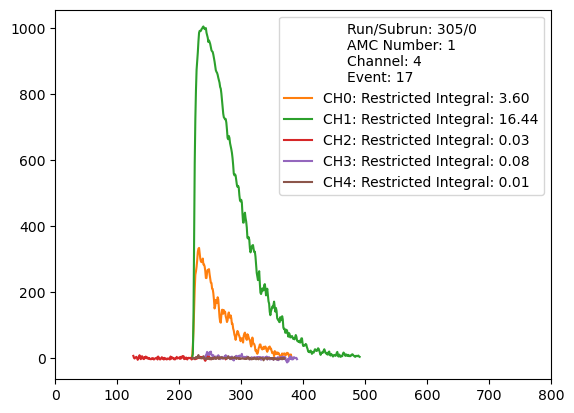

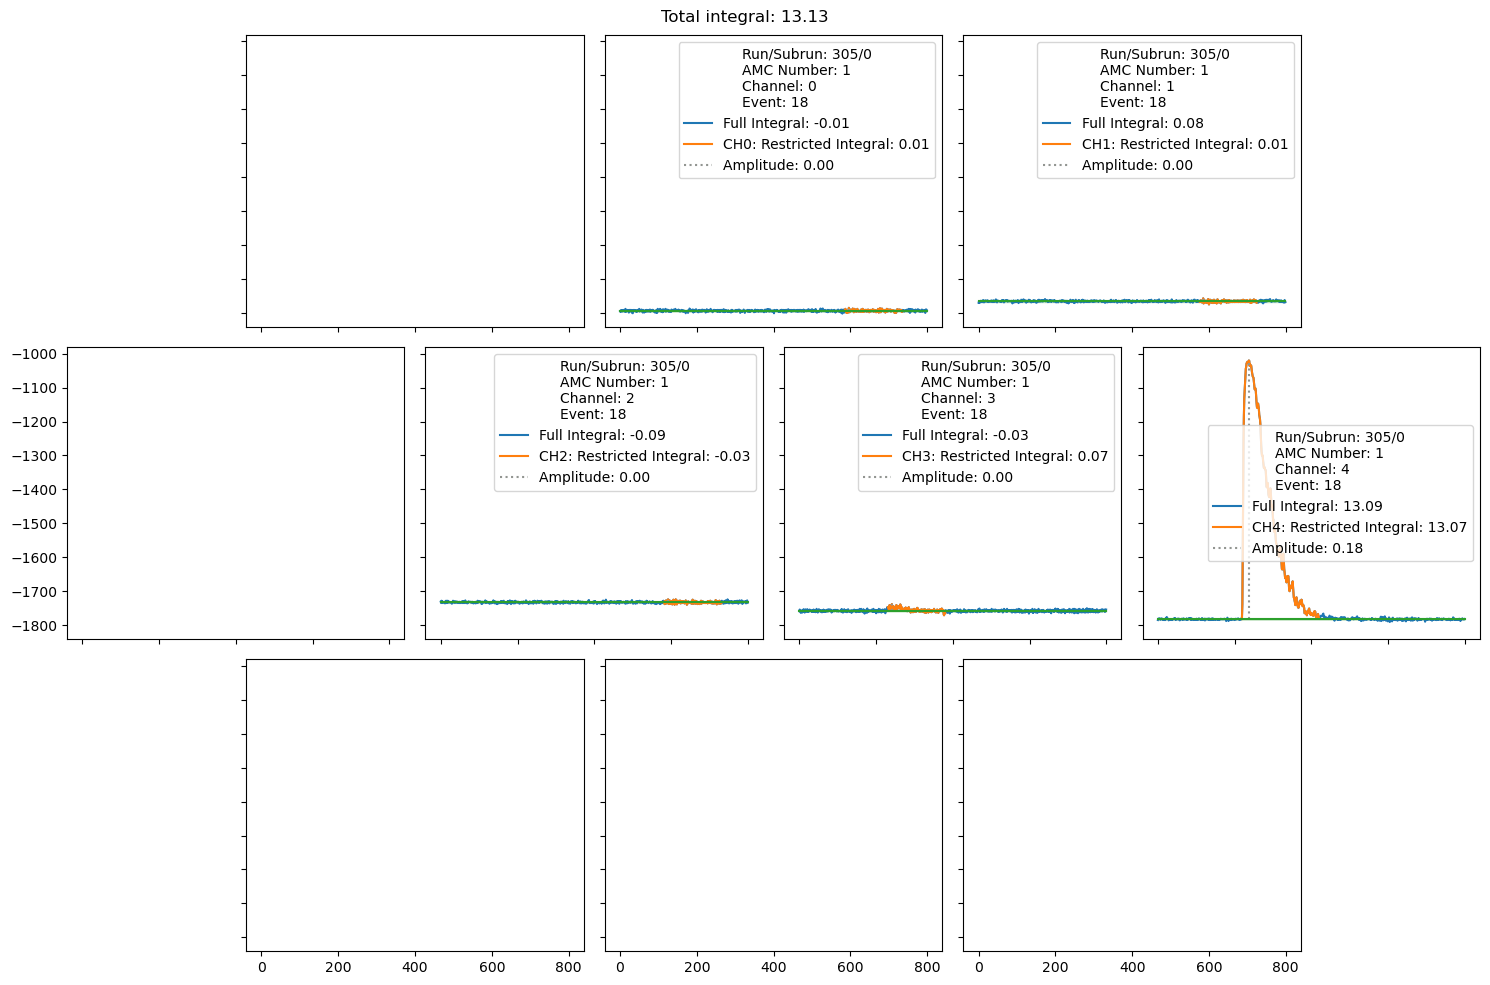

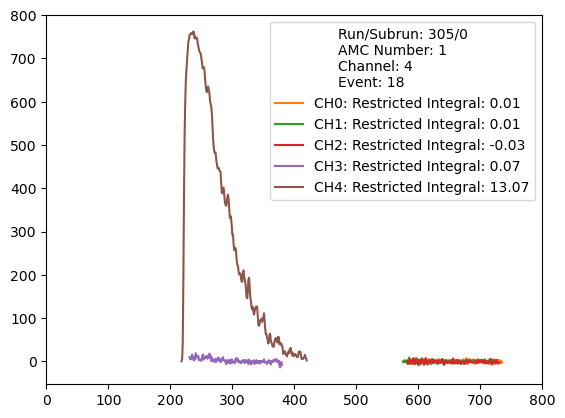

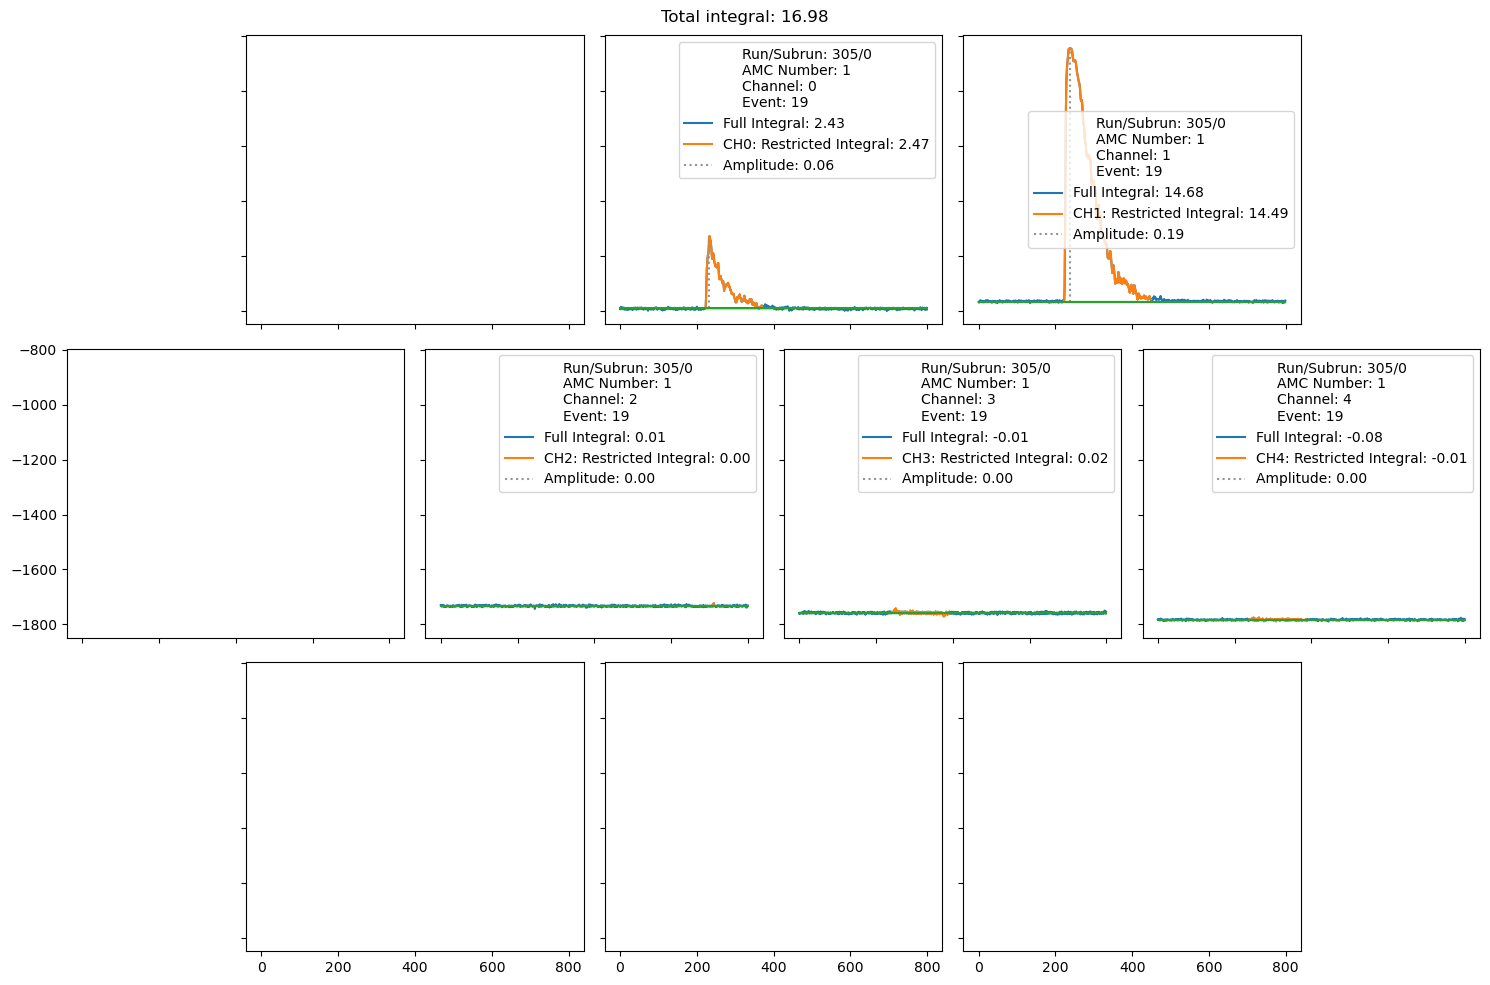

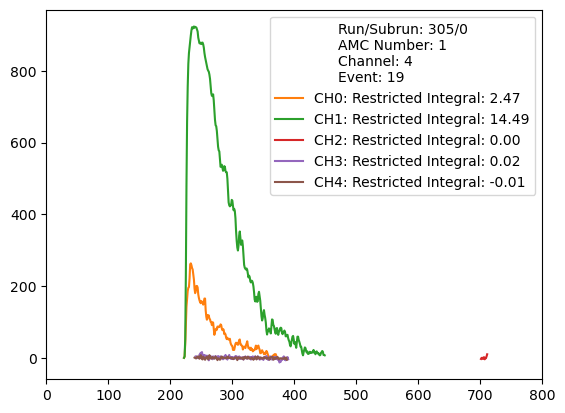

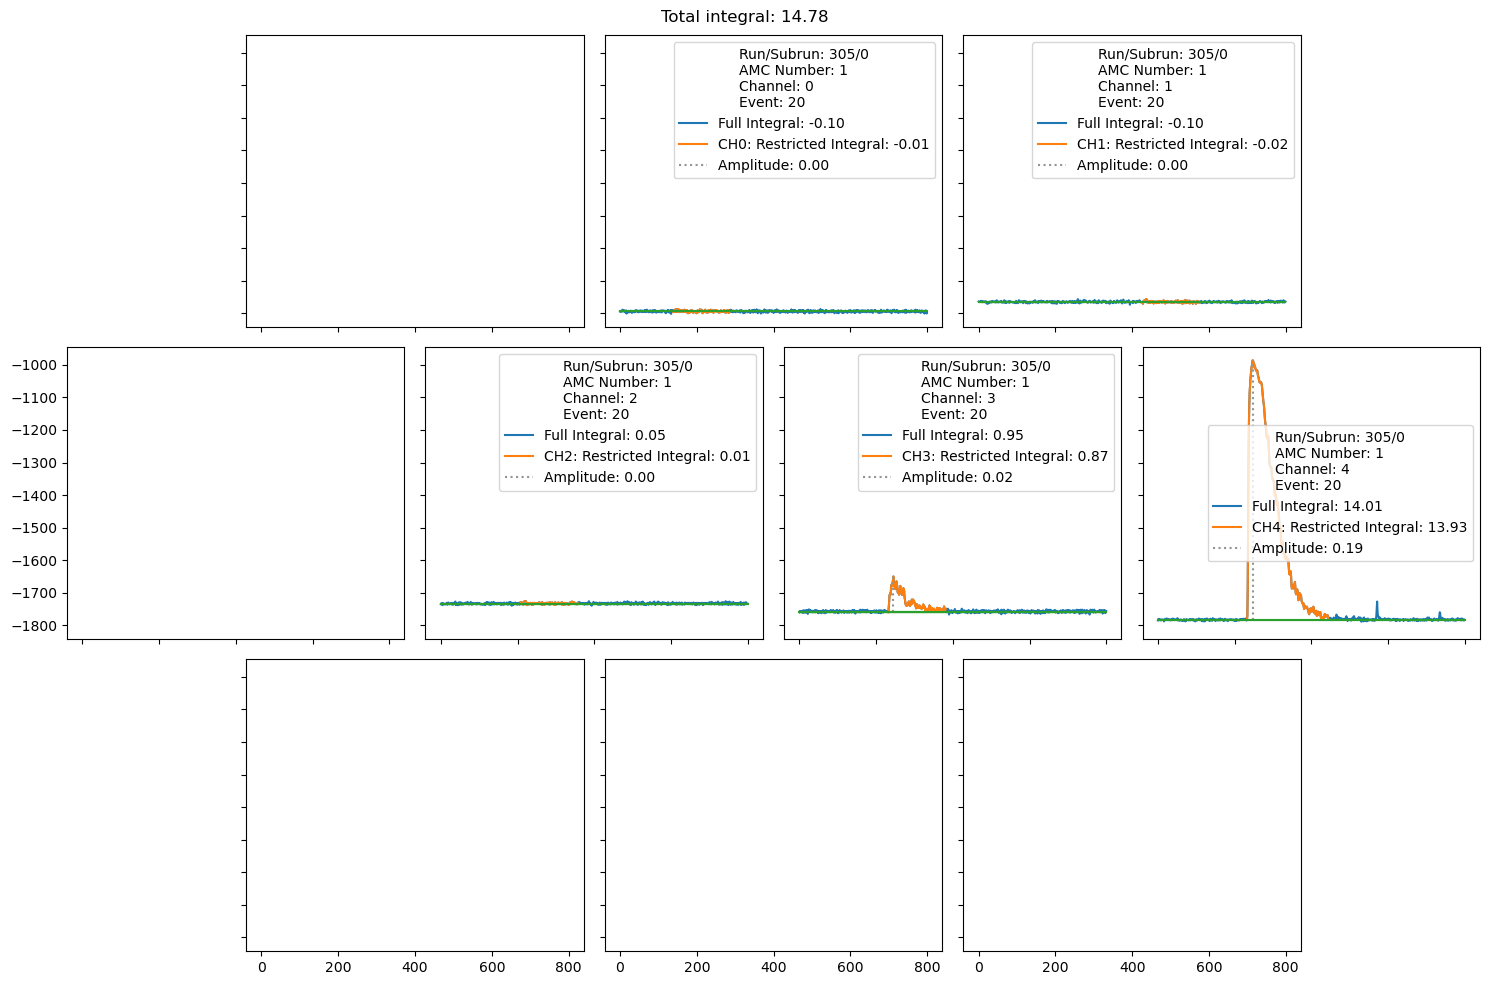

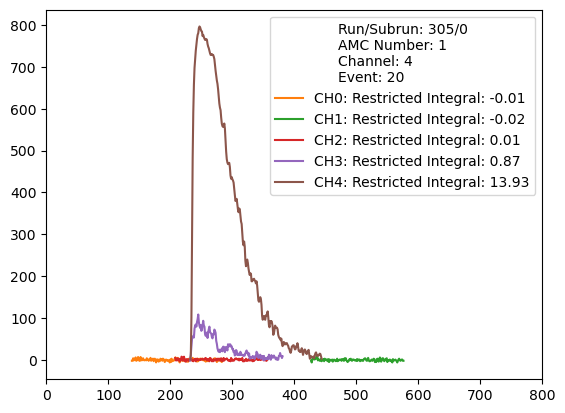

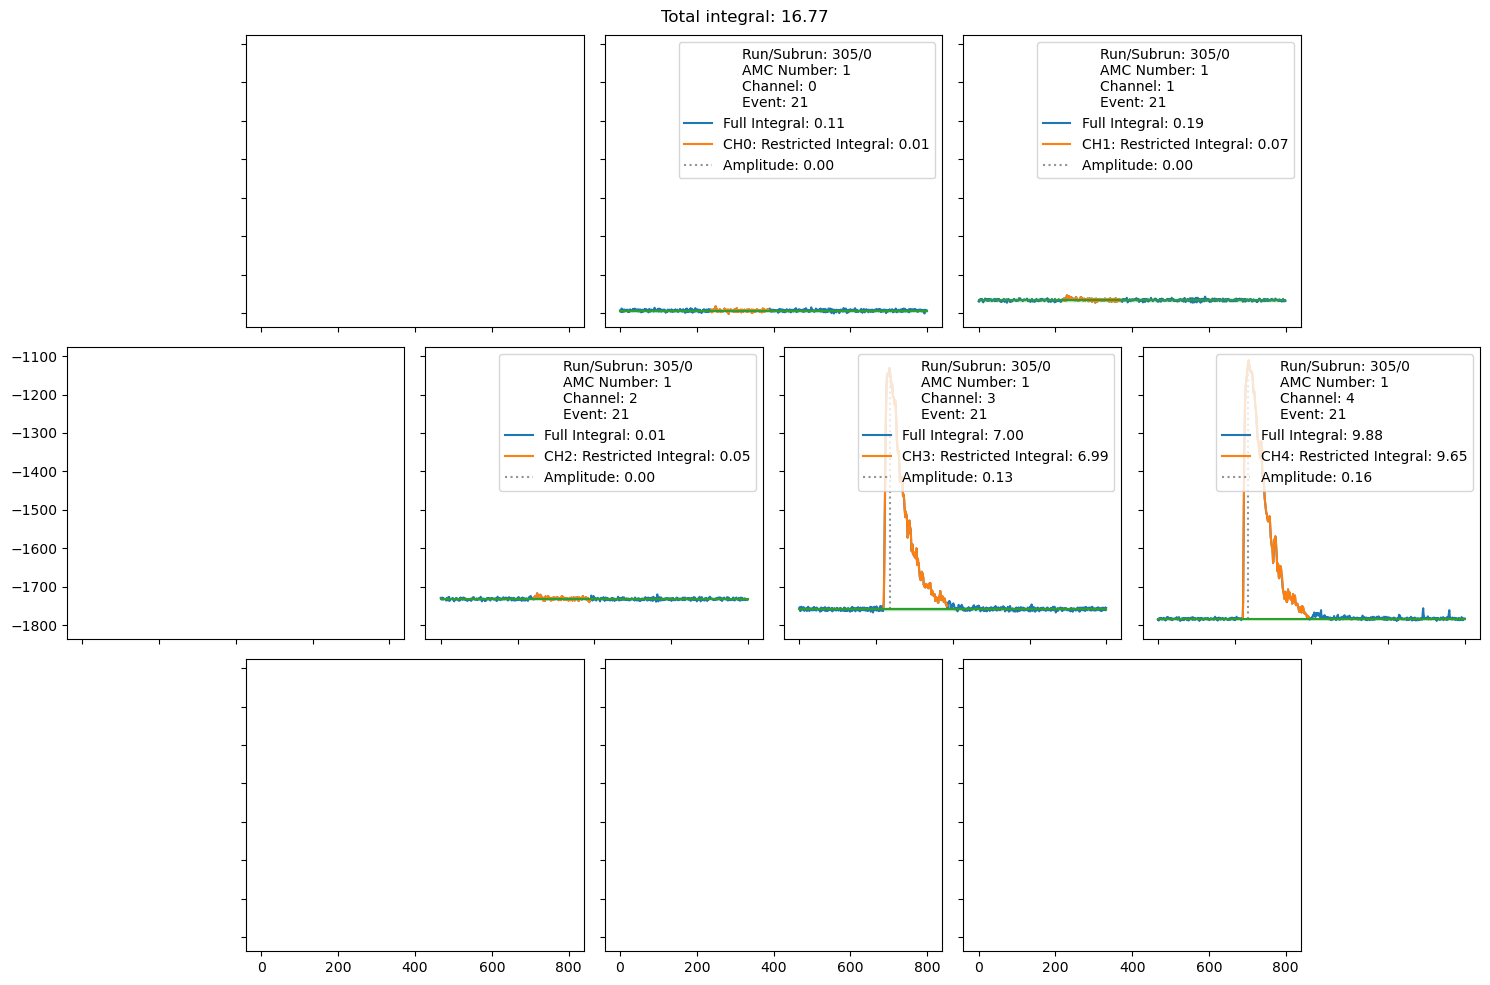

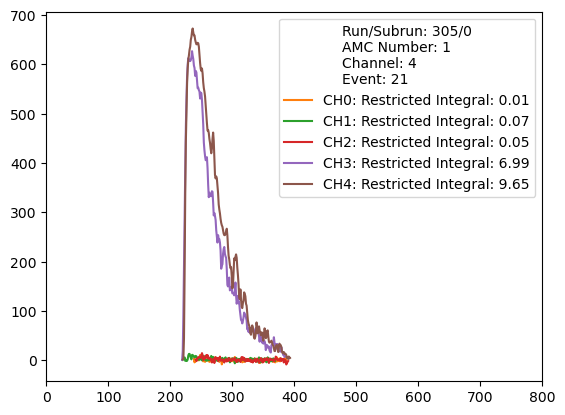

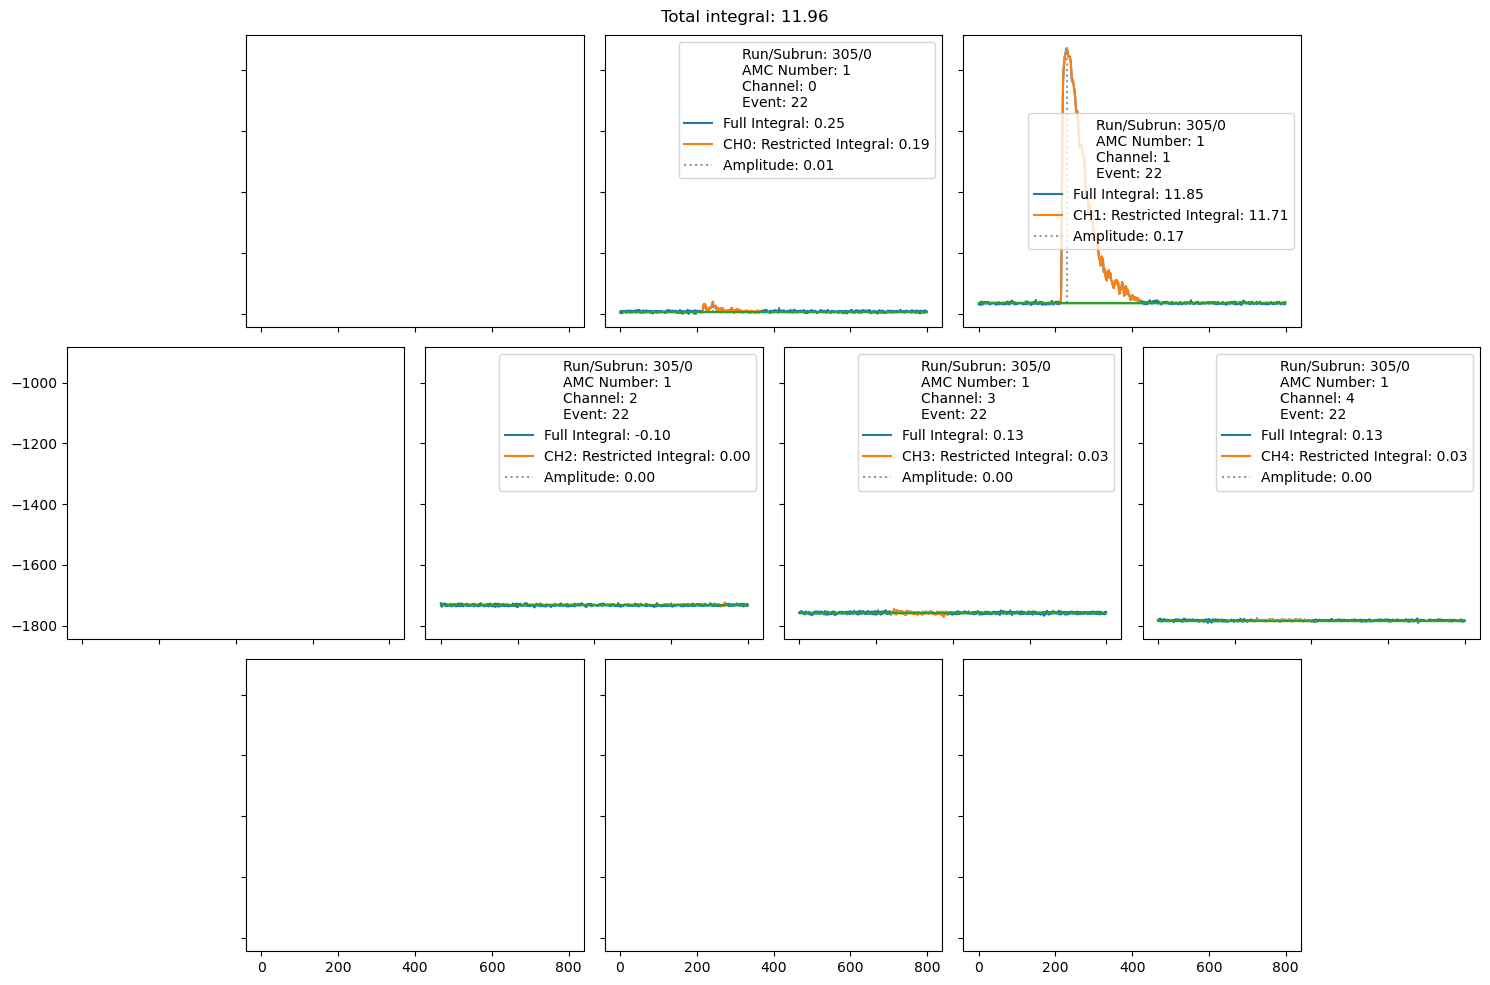

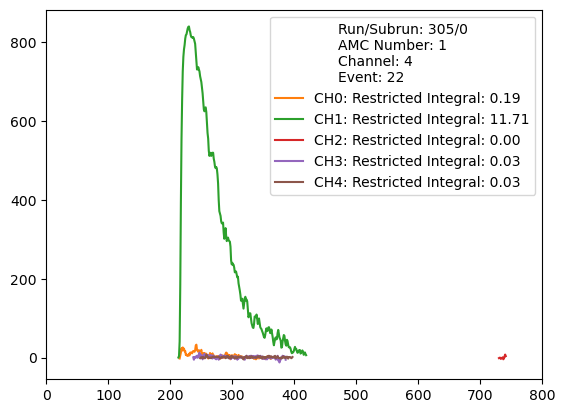

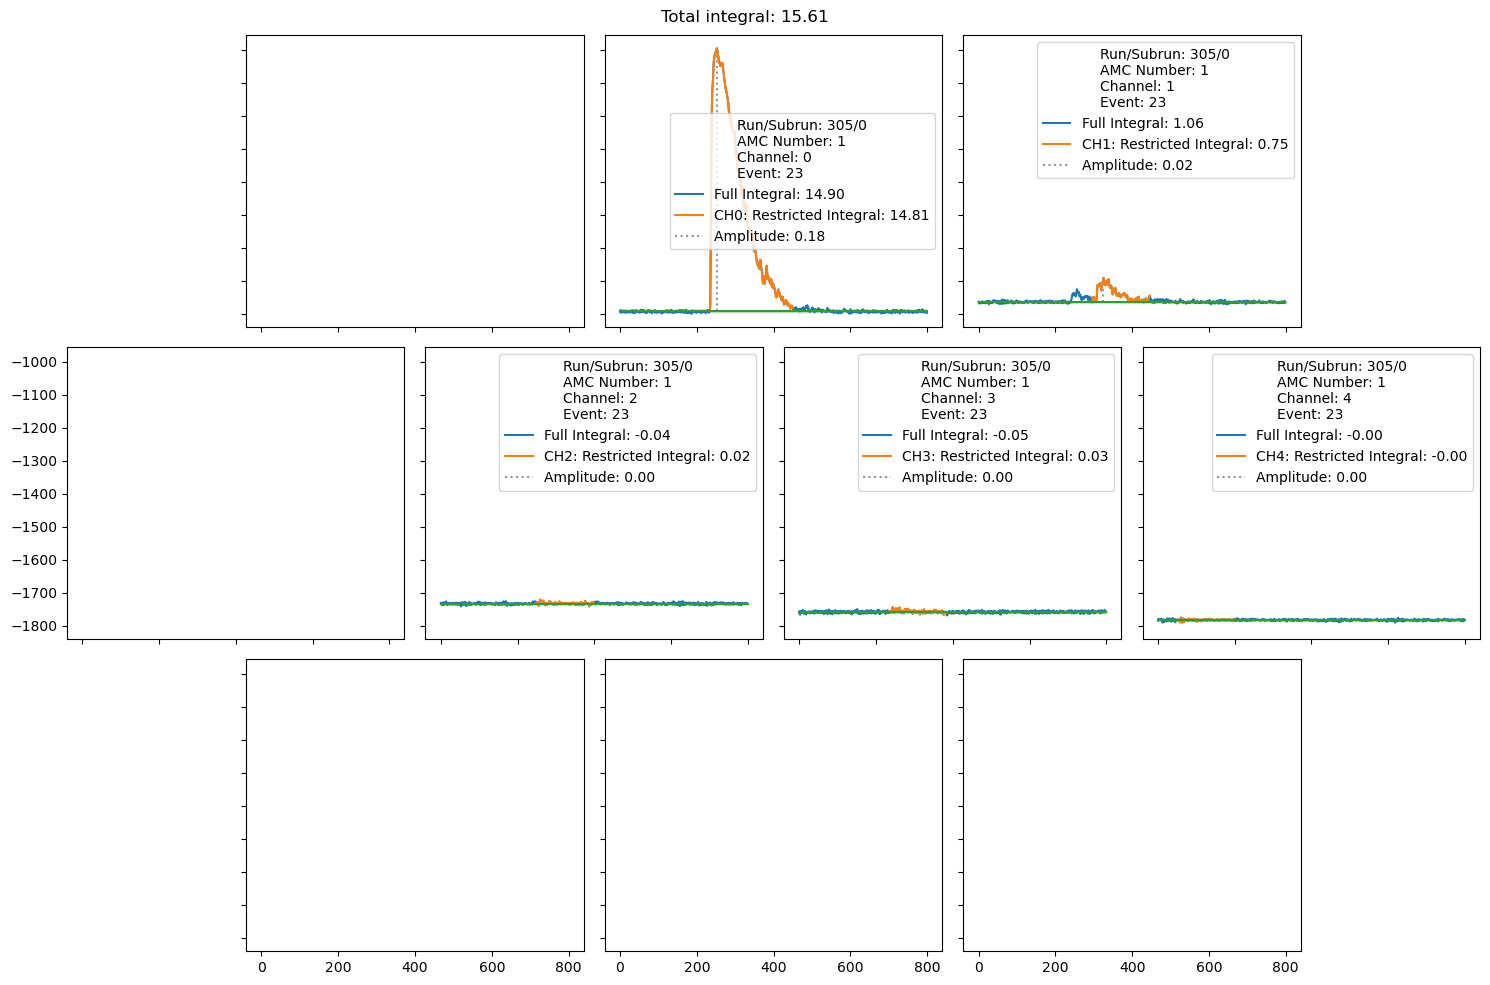

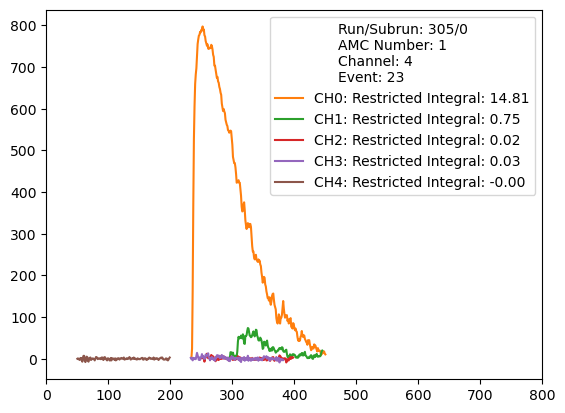

In [4]:
counter = 0
limit = 20
for i, e in enumerate(t):
    energies = [x.integral for x in e.integrals]
    if(np.amax(energies) > 40000):
        plot_event(e.integrals_calibrated)
        plt.show()

        fig,ax = plt.subplots()
        for inti in e.integrals_calibrated:
            if(inti.amcNum == 1):
                plot_integral(inti, ax=ax, subtract_pedestal=True, 
                    plot_pedestal=False, plot_amplitude=False, plot_full=False,
                    color_offset=inti.channelTag
                )
        plt.xlim(0,800)
        plt.show()

        counter += 1
        if(counter > limit):
            break

In [5]:
h = hist.Hist(
    hist.axis.Regular(1000,0,100,label='Peak Energy'),
    hist.axis.Regular(1000,0,100,label='Other Energies'),
    hist.axis.IntCategory(range(5), label='Peak Channel Number'),
    hist.axis.IntCategory(range(5), label='Other Channel Number')
)

for i, e in enumerate(t):
    if e.integrals.size() < 1:
        continue
    energies = [wfi.integral for wfi in e.integrals_calibrated if wfi.amcNum == 1]
    channels = [wfi.channelTag for wfi in e.integrals_calibrated if wfi.amcNum == 1]
    maxe = np.amax(energies)
    peak_channel = channels[energies.index(maxe)]
    h.fill(
        maxe,
        energies,
        peak_channel,
        channels
    )

h

Hist(
  Regular(1000, 0, 100, label='Peak Energy'),
  Regular(1000, 0, 100, label='Other Energies'),
  IntCategory([0, 1, 2, 3, 4], label='Peak Channel Number'),
  IntCategory([0, 1, 2, 3, 4], label='Other Channel Number'),
  storage=Double()) # Sum: 1968476.0 (2230965.0 with flow)

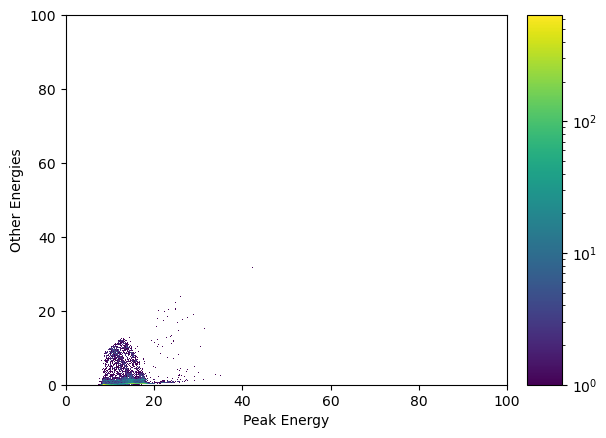

In [18]:
h[:,:,0j,1j].plot(
    norm = matplotlib.colors.LogNorm(vmin=1)
)
plt.show()

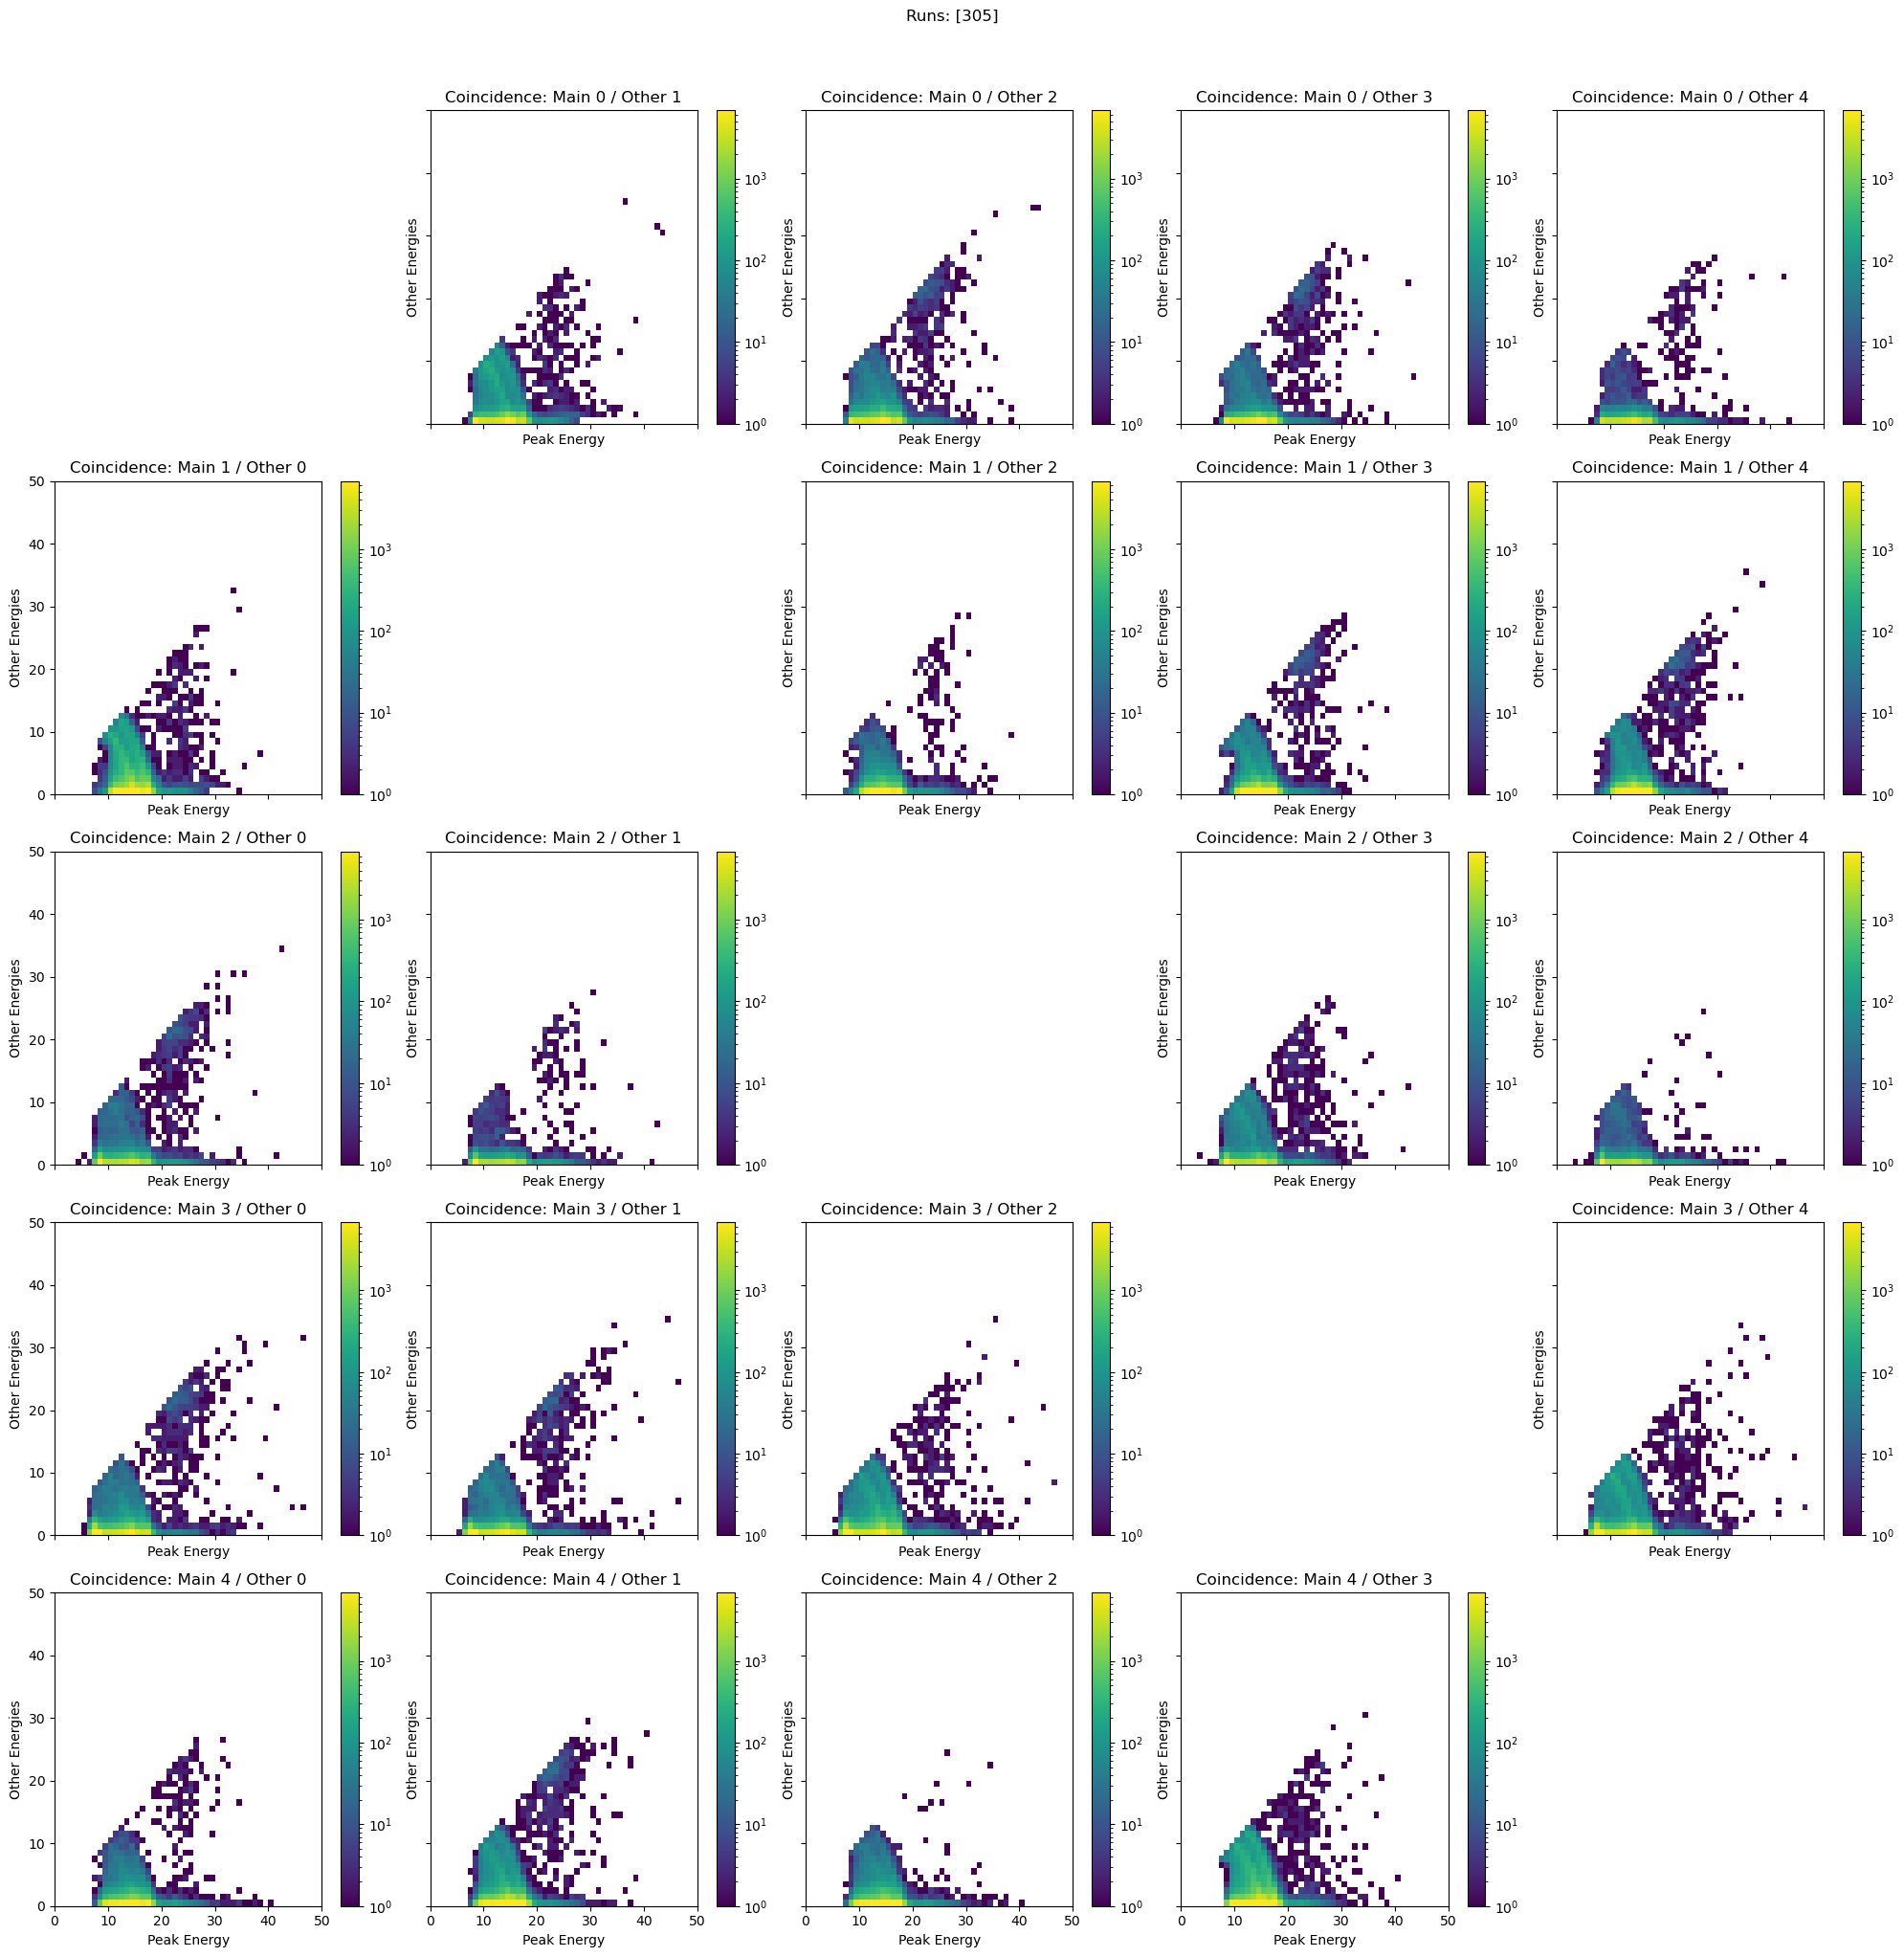

In [23]:
fig,ax = plt.subplots(5,5,figsize=(20,20),sharex=True, sharey=True)
norm = matplotlib.colors.LogNorm(vmin=1)
for mainchannel in range(5):
    for otherchannel in range(5):
        axi = ax[mainchannel][otherchannel]
        if mainchannel == otherchannel:
            axi.set_axis_off()
            continue
        h[:50j:hist.rebin(10),:50j:hist.rebin(10),hist.loc(mainchannel),hist.loc(otherchannel)].plot(
            ax=axi,
            norm=norm,
        )
        axi.set_title(f'Coincidence: Main {mainchannel} / Other {otherchannel}')
plt.suptitle(f"Runs: {runs}",y=1.02)
plt.tight_layout()
# plt.ylim(0.9,None)
# plt.yscale("log")
plt.show()

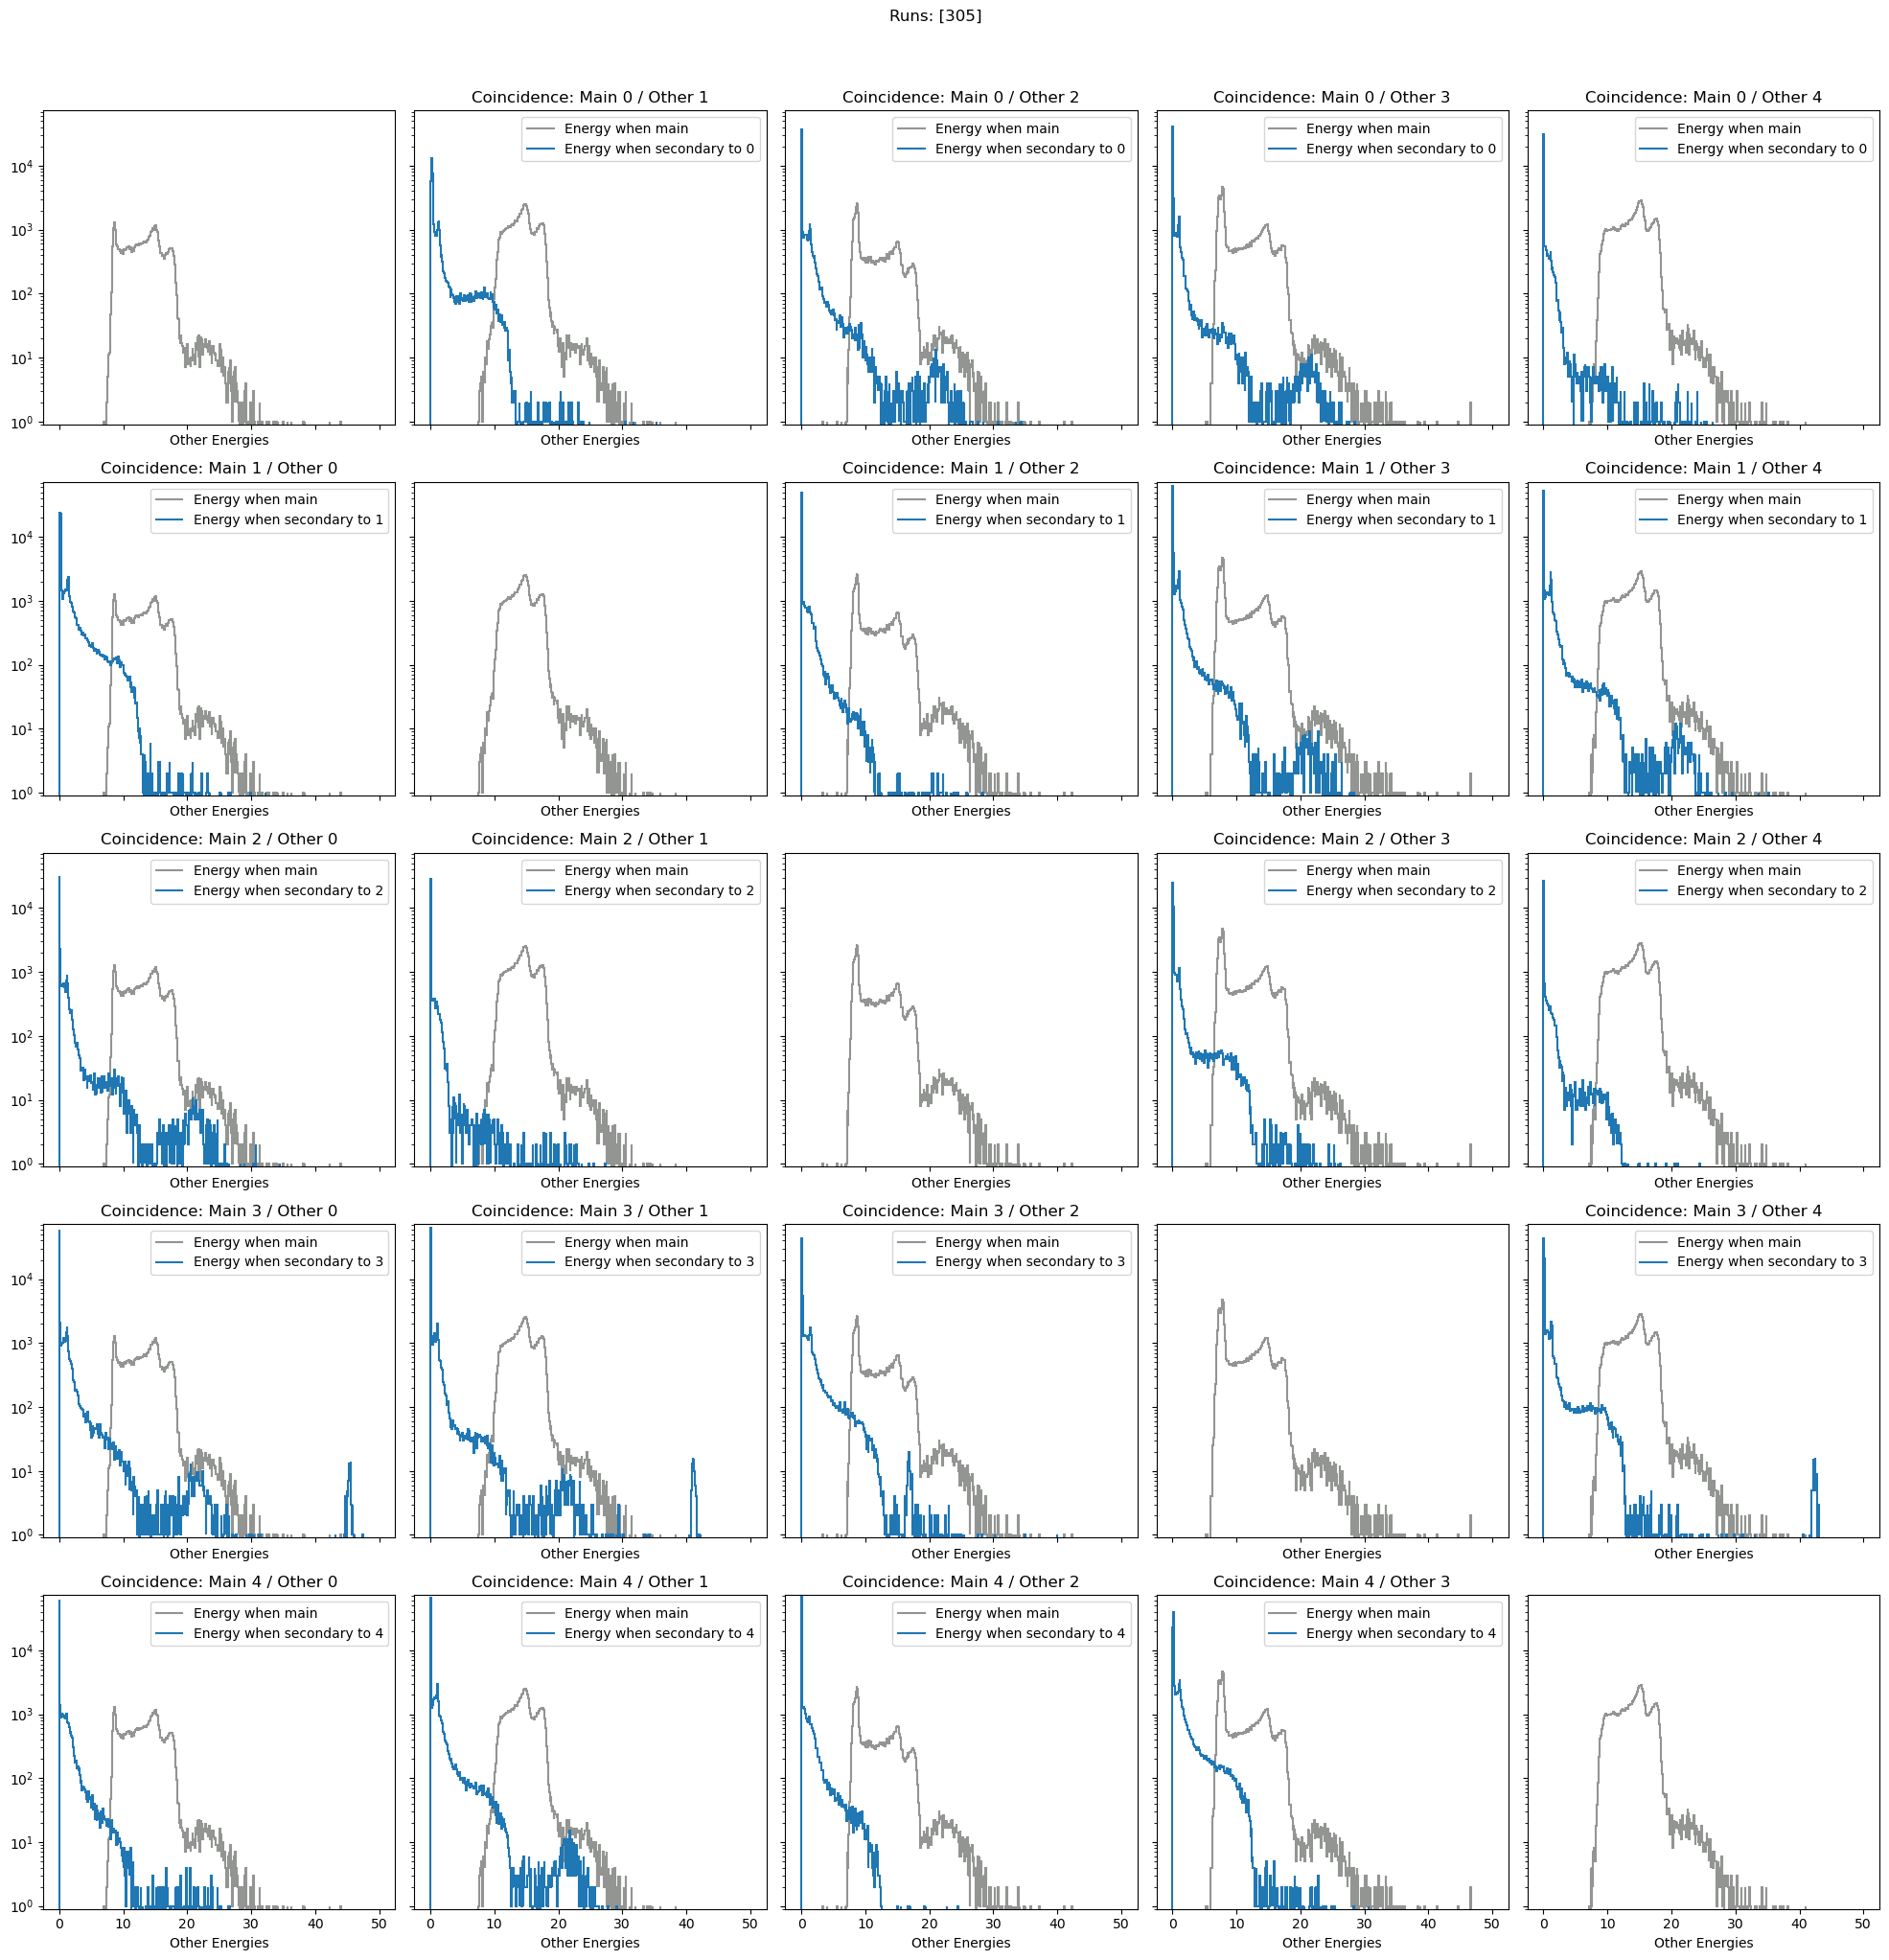

In [24]:
fig,ax = plt.subplots(5,5,figsize=(20,20),sharex=True, sharey=True)
for mainchannel in range(5):
    for otherchannel in range(5):
        axi = ax[mainchannel][otherchannel]
        h[::sum,:50j,hist.loc(otherchannel),hist.loc(otherchannel)].plot(
            # norm = matplotlib.colors.LogNorm(vmin=1)
            yerr=False,
            color='xkcd:grey',
            ax=axi,
            label='Energy when main'
        )
        if mainchannel == otherchannel:
            # axi.set_axis_off()
            continue
        h[::sum,:50j,hist.loc(mainchannel),hist.loc(otherchannel)].plot(
            # norm = matplotlib.colors.LogNorm(vmin=1)
            yerr=False,
            ax=axi,
            label=f'Energy when secondary to {mainchannel}'
        )
        axi.set_title(f'Coincidence: Main {mainchannel} / Other {otherchannel}')
        axi.legend()
plt.suptitle(f"Runs: {runs}",y=1.02)
plt.tight_layout()
plt.ylim(0.9,None)
plt.yscale("log")
plt.show()